In [87]:
!pip install aequitas

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.7/259.7 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━

In [5]:
!rm -rf nd320-c1-emr-data-starter
!git clone https://github.com/udacity/nd320-c1-emr-data-starter.git


Cloning into 'nd320-c1-emr-data-starter'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 206 (delta 39), reused 31 (delta 31), pack-reused 151 (from 1)
Receiving objects: 100% (206/206), 11.44 MiB | 12.53 MiB/s, done.
Resolving deltas: 100% (84/84), done.


# Overview

1. Project Instructions & Prerequisites
2. Learning Objectives
3. Data Preparation
4. Create Categorical Features with TF Feature Columns
5. Create Continuous/Numerical Features with TF Feature Columns
6. Build Deep Learning Regression Model with Sequential API and TF Probability Layers
7. Evaluating Potential Model Biases with Aequitas Toolkit


#  1. Project Instructions & Prerequisites

## Project Instructions

**Context**: EHR data is becoming a key source of real-world evidence (RWE) for the pharmaceutical industry and regulators to [make decisions on clinical trials](https://www.fda.gov/news-events/speeches-fda-officials/breaking-down-barriers-between-clinical-trials-and-clinical-care-incorporating-real-world-evidence). You are a data scientist for an exciting unicorn healthcare startup that has created a groundbreaking diabetes drug that is ready for clinical trial testing. It is a very unique and sensitive drug that requires administering the drug over at least 5-7 days of time in the hospital with frequent monitoring/testing and patient medication adherence training with a mobile application. You have been provided a patient dataset from a client partner and are tasked with building a predictive model that can identify which type of patients the company should focus their efforts testing this drug on. Target patients are people that are likely to be in the hospital for this duration of time and will not incur significant additional costs for administering this drug to the patient and monitoring.  

In order to achieve your goal you must build a regression model that can predict the estimated hospitalization time for a patient and use this to select/filter patients for your study.


**Expected Hospitalization Time Regression Model:** Utilizing a synthetic dataset(denormalized at the line level augmentation) built off of the UCI Diabetes readmission dataset, students will build a regression model that predicts the expected days of hospitalization time and then convert this to a binary prediction of whether to include or exclude that patient from the clinical trial.

This project will demonstrate the importance of building the right data representation at the encounter level, with appropriate filtering and preprocessing/feature engineering of key medical code sets. This project will also require students to analyze and interpret their model for biases across key demographic groups.

Please see the project rubric online for more details on the areas your project will be evaluated.

### Dataset

Due to healthcare PHI regulations (HIPAA, HITECH), there are limited number of publicly available datasets and some datasets require training and approval. So, for the purpose of this exercise, we are using a dataset from UC Irvine(https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008) that has been modified for this course. Please note that it is limited in its representation of some key features such as diagnosis codes which are usually an unordered list in 835s/837s (the HL7 standard interchange formats used for claims and remits).

**Data Schema**
The dataset reference information can be https://github.com/udacity/nd320-c1-emr-data-starter/blob/master/project/data_schema_references/
. There are two CSVs that provide more details on the fields and some of the mapped values.

## Project Submission

When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "student_project_submission.ipynb" and save another copy as an HTML file by clicking "File" -> "Download as.."->"html". Include the "utils.py" and "student_utils.py" files in your submission. The student_utils.py should be where you put most of your code that you write and the summary and text explanations should be written inline in the notebook. Once you download these files, compress them into one zip file for submission.

## Prerequisites

- Intermediate level knowledge of Python
- Basic knowledge of probability and statistics
- Basic knowledge of machine learning concepts
- Installation of Tensorflow 2.0 and other dependencies(conda environment.yml or virtualenv requirements.txt file provided)

## Environment Setup

For step by step instructions on creating your environment, please go to https://github.com/udacity/nd320-c1-emr-data-starter/blob/master/project/README.md.

# 2.  Learning Objectives

By the end of the project, you will be able to
   - Use the Tensorflow Dataset API to scalably extract, transform, and load datasets and build datasets aggregated at the line, encounter, and patient data levels(longitudinal)
   - Analyze EHR datasets to check for common issues (data leakage, statistical properties, missing values, high cardinality) by performing exploratory data analysis.
   - Create categorical features from Key Industry Code Sets (ICD, CPT, NDC) and reduce dimensionality for high cardinality features by using embeddings
   - Create derived features(bucketing, cross-features, embeddings) utilizing Tensorflow feature columns on both continuous and categorical input features
   - SWBAT use the Tensorflow Probability library to train a model that provides uncertainty range predictions that allow for risk adjustment/prioritization and triaging of predictions
   - Analyze and determine biases for a model for key demographic groups by evaluating performance metrics across groups by using the Aequitas framework


# 3. Data Preparation

In [1]:
# from __future__ import absolute_import, division, print_function, unicode_literals
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
import pandas as pd
import aequitas as ae
# Put all of the helper functions in utils
#from utils import build_vocab_files, show_group_stats_viz, aggregate_dataset, preprocess_df, df_to_dataset, posterior_mean_field, prior_trainable
pd.set_option('display.max_columns', 500)
# this allows you to make changes and save in student_utils.py and the file is reloaded every time you run a code block
%load_ext autoreload
%autoreload

In [2]:
#OPEN ISSUE ON MAC OSX for TF model training
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Dataset Loading and Schema Review

Load the dataset and view a sample of the dataset along with reviewing the schema reference files to gain a deeper understanding of the dataset. The dataset is located at the following path https://github.com/udacity/nd320-c1-emr-data-starter/blob/master/project/starter_code/data/final_project_dataset.csv. Also, review the information found in the data schema https://github.com/udacity/nd320-c1-emr-data-starter/blob/master/project/data_schema_references/

In [4]:
dataset_path = "/content/nd320-c1-emr-data-starter/project/starter_code/data/final_project_dataset.csv"
df = pd.read_csv(dataset_path)

In [5]:
df.head(3)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,primary_diagnosis_code,other_diagnosis_codes,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,number_diagnoses,num_medications,num_procedures,ndc_code,max_glu_serum,A1Cresult,change,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,250.83,?|?,0,0,0,41,1,1,0,NaN,NaN,NaN,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,276,250.01|255,0,0,0,59,9,18,0,68071-1701,NaN,NaN,Ch,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,648,250|V27,2,1,0,11,6,13,5,0378-1110,NaN,NaN,No,NO


In [ ]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,number_outpatient,number_inpatient,number_emergency,num_lab_procedures,number_diagnoses,num_medications,num_procedures
count,1.434240e+05,1.434240e+05,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000,143424.000000
mean,1.674290e+08,5.493608e+07,2.027694,3.655316,5.701096,4.490190,0.362429,0.600855,0.195086,43.255745,7.424434,16.776035,1.349021
std,1.019046e+08,3.857840e+07,1.427585,5.219279,4.064532,2.999667,1.249295,1.207934,0.920410,19.657319,1.924872,8.397130,1.719104
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,8.829596e+07,2.357219e+07,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,32.000000,6.000000,11.000000,0.000000
50%,1.547637e+08,4.630783e+07,1.000000,1.000000,7.000000,4.000000,0.000000,0.000000,0.000000,44.000000,8.000000,15.000000,1.000000
75%,2.320897e+08,8.823627e+07,3.000000,3.000000,7.000000,6.000000,0.000000,1.000000,0.000000,57.000000,9.000000,21.000000,2.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,42.000000,21.000000,76.000000,132.000000,16.000000,81.000000,6.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143424 entries, 0 to 143423
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              143424 non-null  int64 
 1   patient_nbr               143424 non-null  int64 
 2   race                      143424 non-null  object
 3   gender                    143424 non-null  object
 4   age                       143424 non-null  object
 5   weight                    143424 non-null  object
 6   admission_type_id         143424 non-null  int64 
 7   discharge_disposition_id  143424 non-null  int64 
 8   admission_source_id       143424 non-null  int64 
 9   time_in_hospital          143424 non-null  int64 
 10  payer_code                143424 non-null  object
 11  medical_specialty         143424 non-null  object
 12  primary_diagnosis_code    143424 non-null  object
 13  other_diagnosis_codes     143424 non-null  object
 14  numb

In [7]:
# Count unique patients
unique_patients = df['patient_nbr'].nunique()

# Total number of rows
total_rows = len(df)

# Count patients with multiple encounters
multi_encounters = df['patient_nbr'].value_counts()
num_multi_encounter_patients = (multi_encounters > 1).sum()

# Count unique encounter IDs
unique_encounters = df['encounter_id'].nunique()

# Create a summary DataFrame
import pandas as pd

summary_data = {
    "Metric": [
        "Total number of rows",
        "Number of unique encounter IDs",
        "Number of unique patients",
        "Number of patients with multiple encounters"
    ],
    "Value": [
        total_rows,
        unique_encounters,
        unique_patients,
        num_multi_encounter_patients
    ],
    "Interpretation": [
        "Represents individual records (likely encounters)",
        "Each encounter_id is unique → one visit per row",
        "Number of distinct patients in the dataset",
        "Many patients have more than one hospital visit"
    ]
}

summary_df = pd.DataFrame(summary_data)

# Display the summary table
summary_df


,Metric,Value,Interpretation
0,Total number of rows,143424,Represents individual records (likely encounters)
1,Number of unique encounter IDs,101766,Each encounter_id is unique → one visit per row
2,Number of unique patients,71518,Number of distinct patients in the dataset
3,Number of patients with multiple encounters,33737,Many patients have more than one hospital visit


## Determine Level of Dataset (Line or Encounter)

**Question 1**: Based off of analysis of the data, what level is this dataset? Is it at the line or encounter level? Are there any key fields besides the encounter_id and patient_nbr fields that we should use to aggregate on? Knowing this information will help inform us what level of aggregation is necessary for future steps and is a step that is often overlooked.

Student Response:

Based on the analysis of the data, the dataset is at the encounter level, as multiple records exist for the same patient, each identified by a unique encounter_id. While patient_nbr can be used to group data by patient, other fields such as admission_type_id, discharge_disposition_id, and admission_source_id may also provide valuable context for aggregation depending on the analysis goals. Understanding this level of granularity is crucial for determining appropriate aggregation strategies in future steps.

## Analyze Dataset

**Question 2**: Utilizing the library of your choice (recommend Pandas and Seaborn or matplotlib though), perform exploratory data analysis on the dataset. In particular be sure to address the following questions:  
    - a. Field(s) with high amount of missing/zero values
    - b. Based off the frequency histogram for each numerical field, which numerical field(s) has/have a Gaussian(normal) distribution shape?
    - c. Which field(s) have high cardinality and why (HINT: ndc_code is one feature)
    - d. Please describe the demographic distributions in the dataset for the age and gender fields.
    


In [8]:
def check_for_missing_and_null(df):
    null_df = pd.DataFrame({'columns': df.columns,
                            'percent_null': df.isnull().sum() * 100 / len(df),
                            'percent_zero': df.isin([0]).sum() * 100 / len(df),
                            'percent_?': (df == '?').sum() * 100 / len(df)})
    return null_df.sort_values(by='percent_null', ascending=False)

In [9]:
null_df=check_for_missing_and_null(df)
null_df

,columns,percent_null,percent_zero,percent_?
max_glu_serum,max_glu_serum,95.108908,0.000000,0.000000
A1Cresult,A1Cresult,82.029507,0.000000,0.000000
ndc_code,ndc_code,16.358490,0.000000,0.000000
race,race,0.000000,0.000000,2.307145
age,age,0.000000,0.000000,0.000000
weight,weight,0.000000,0.000000,97.000502
admission_type_id,admission_type_id,0.000000,0.000000,0.000000
gender,gender,0.000000,0.000000,0.000000
encounter_id,encounter_id,0.000000,0.000000,0.000000
patient_nbr,patient_nbr,0.000000,0.000000,0.000000


In [10]:
import pandas as pd

def clean_ehr_data(df):
    # Supprimer les colonnes avec plus de 80% de données manquantes ou inutiles
    cols_to_drop = ['weight', 'max_glu_serum', 'A1Cresult']
    df = df.drop(columns=cols_to_drop)

    # Colonnes à traiter pour valeurs manquantes représentées par '?'
    cols_with_question_mark = ['medical_specialty', 'race', 'payer_code', 'primary_diagnosis_code']
    for col in cols_with_question_mark:
        df[col] = df[col].replace('?', pd.NA)

    # Imputation par le mode pour 'medical_specialty'
    df['medical_specialty'] = df['medical_specialty'].fillna(df['medical_specialty'].mode()[0])

    # Supprimer les lignes avec race manquant
    df = df.dropna(subset=['race'])

    # Imputation du mode pour payer_code
    df['payer_code'] = df['payer_code'].fillna(df['payer_code'].mode()[0])

    # Imputation du mode pour ndc_code
    df['ndc_code'] = df['ndc_code'].fillna(df['ndc_code'].mode()[0])

    # Supprimer les lignes avec primary_diagnosis_code manquant (faible proportion)
    df = df.dropna(subset=['primary_diagnosis_code'])

    # Afficher les statistiques de nettoyage
    print("Données nettoyées :")
    print(df.isna().sum())


    return df

# Nettoyage
df_cleaned = clean_ehr_data(df)




Données nettoyées :
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
primary_diagnosis_code      0
other_diagnosis_codes       0
number_outpatient           0
number_inpatient            0
number_emergency            0
num_lab_procedures          0
number_diagnoses            0
num_medications             0
num_procedures              0
ndc_code                    0
change                      0
readmitted                  0
dtype: int64


In [11]:
null_df=check_for_missing_and_null(df_cleaned)
null_df

,columns,percent_null,percent_zero,percent_?
encounter_id,encounter_id,0.0,0.000000,0.0
patient_nbr,patient_nbr,0.0,0.000000,0.0
race,race,0.0,0.000000,0.0
gender,gender,0.0,0.000000,0.0
age,age,0.0,0.000000,0.0
admission_type_id,admission_type_id,0.0,0.000000,0.0
discharge_disposition_id,discharge_disposition_id,0.0,0.000000,0.0
admission_source_id,admission_source_id,0.0,0.000000,0.0
time_in_hospital,time_in_hospital,0.0,0.000000,0.0
payer_code,payer_code,0.0,0.000000,0.0


Explanation of Missing Data Handling and Cleaning Strategy
In the process of preparing the data for building our predictive model, it was essential to address both true missing values and placeholder entries such as '?', which represent unknown or unrecorded information. These entries are not technically NaN, but they indicate unavailable data and must be treated as such to ensure consistency.

At the same time, numeric values such as 0 were retained when they had valid meaning in the clinical context, particularly in variables where 0 is a legitimate and interpretable entry (e.g., medication counts or diagnosis codes).

Below are the key cleaning steps we applied, along with the rationale behind each, based on the mechanisms of missing data: MCAR (Missing Completely at Random), MAR (Missing at Random), and MNAR (Missing Not at Random).

Dropping columns with a high percentage of missing values

max_glu_serum and A1Cresult: These two columns had 95% and 82% missing values respectively, making them potentially redundant and unreliable for our model. Given the very high percentage of missing data, we decided to drop these columns.
The missingness in these features is likely MCAR, meaning the missing values are unrelated to any other variables and could result from systematic data collection issues (e.g., many patients not tested).

weight: This variable is clinically important, especially in a dataset focused on diabetes. However, the extent of missing values coded as '?' was extremely high—over 97%, making it practically impossible to impute reliably or use effectively in modeling. For that reason, we dropped this variable as well. Although its clinical value is recognized, the data quality was insufficient to keep it. The missing mechanism here is likely MNAR—patients with extreme or sensitive weight values might not have had them recorded intentionally.

Replacing '?' entries with NaN
Several columns used '?' as a placeholder for unknown values. These were replaced with NaN to unify the treatment of missing data across the dataset.

Columns affected included: medical_specialty, race, payer_code, and primary_diagnosis_code.
Depending on the variable, the missingness can be MAR (e.g., specialty not recorded for less documented patients) or MCAR (e.g., random absence of race data).

Imputing missing values with the most frequent value (mode)

medical_specialty: Around 48% of values were missing (coded as '?'). After replacing '?' with NaN, we imputed the mode (most frequent value). This method is appropriate when the missingness is likely MAR.

payer_code: Contrary to earlier steps where it was dropped, we kept this variable and treated '?' as missing. We replaced these unknowns with the mode of the column. The missingness here may also be MAR, linked to other patient information but not directly to the target variable.

ndc_code: For missing values in this variable (which identifies drug codes), we also applied mode imputation.

Dropping rows with missing values for critical variables

race: Rows with missing race (after replacing '?' with NaN) were dropped. This is justified given its potential impact on the target and the feasibility of model training.

primary_diagnosis_code: After converting '?' to NaN, we found that only 0.023% of rows were affected. Due to this minimal impact and the importance of having a valid diagnosis code, we chose to drop these rows rather than impute uncertain values. The missingness here is likely MCAR.

In [12]:
numerical_cols = df_cleaned.select_dtypes(include='number').columns

                          nb_outliers  percentage
number_outpatient             23067.0   16.466549
number_emergency              15855.0   11.318209
discharge_disposition_id      13717.0    9.791982
admission_source_id            9490.0    6.774507
number_inpatient               9016.0    6.436138
num_procedures                 7074.0    5.049827
num_medications                3887.0    2.774764
time_in_hospital               3260.0    2.327175
admission_type_id               514.0    0.366923
number_diagnoses                333.0    0.237715
num_lab_procedures              282.0    0.201308
patient_nbr                     191.0    0.136347
encounter_id                      0.0    0.000000


<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()
<ipython-input-12-c12045036039>:37: UserWarning: Tight layout not applied. tight_layo

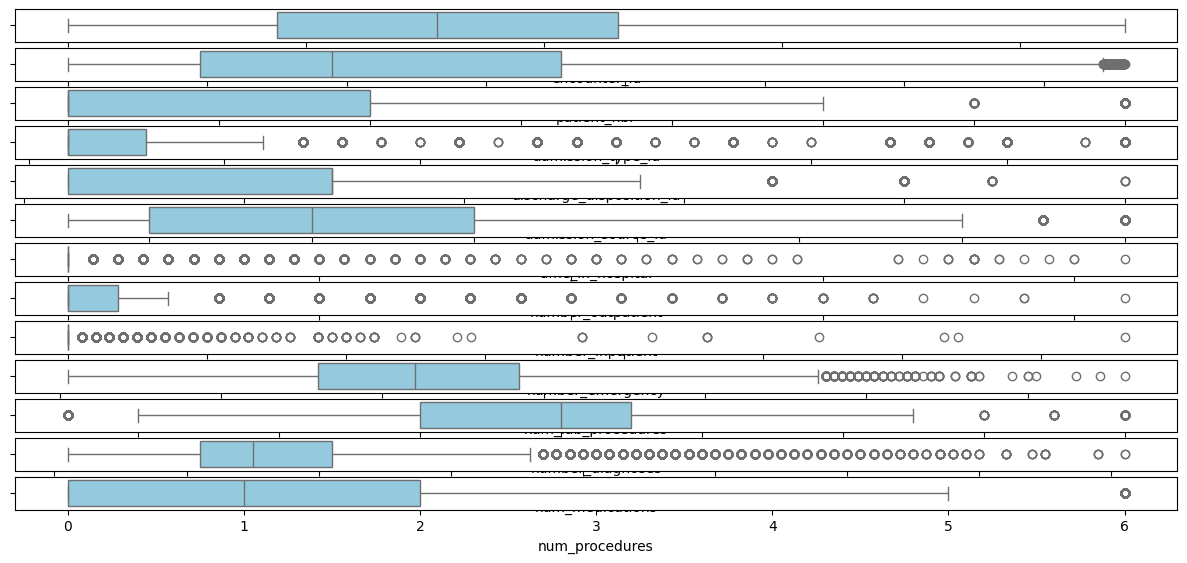

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sélection des colonnes numériques
numerical_cols = df_cleaned.select_dtypes(include='number').columns

# Initialiser un dictionnaire pour stocker les outliers
outliers_dict = {}

# Boucle sur chaque colonne numérique
for col in numerical_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    outliers_dict[col] = {
        'nb_outliers': len(outliers),
        'percentage': 100 * len(outliers) / len(df_cleaned)
    }

# Affichage des résultats sous forme de DataFrame
outliers_df = pd.DataFrame(outliers_dict).T
outliers_df = outliers_df.sort_values(by='nb_outliers', ascending=False)

# Affichage
print(outliers_df)

# Visualisation des outliers avec boxplots
plt.figure(figsize=(15, len(numerical_cols)*0.5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=df_cleaned, x=col, color='skyblue')
    plt.tight_layout()
plt.show()


Outlier Analysis in EHR Data and Handling Strategy
As part of our project to predict which patients are likely to participate in clinical trials, we carried out a crucial data cleaning step: outlier detection and analysis.

Below is a summary table of the columns with extreme values:

Column	Nb. of outliers	Percentage
number_outpatient	23,069	16.46%
number_emergency	15,859	11.32%
discharge_disposition_id	13,724	9.79%
admission_source_id	9,491	6.77%
number_inpatient	9,025	6.44%
num_procedures	7,074	5.05%
num_medications	3,887	2.77%
time_in_hospital	3,260	2.33%
admission_type_id	514	0.37%
number_diagnoses	333	0.24%
num_lab_procedures	282	0.20%
patient_nbr	191	0.14%
encounter_id	0	0.00%

Clinical Interpretation and Reasoning
We categorized the outlier-containing features to understand whether the extreme values are clinically meaningful or should be treated.

1. Features related to patient visit frequency:
number_outpatient, number_emergency, number_inpatient

These features represent the number of outpatient visits, emergency room visits, and hospitalizations.
➡️ High values in these columns reflect real-world chronic or complex patients, not errors.
These are not true outliers in a clinical context.
Decision: Keep these values and apply scaling (e.g., normalization or log-transformation) during TensorFlow dataset preprocessing to avoid skewing model training.

2. Continuous numerical clinical features:
num_procedures, num_medications, time_in_hospital, number_diagnoses, num_lab_procedures

These columns describe clinical care intensity, such as how many procedures or medications a patient received.
➡️ Although some values are extreme, they are still valid and may reflect more severe or complex cases.
Decision: Retain them, and use:

Standard normalization (tf.keras.layers.Normalization), or

Logarithmic transformation, if distributions are heavily skewed.

3. Categorical features encoded as integers:
discharge_disposition_id, admission_source_id, admission_type_id

These are categorical codes representing how the patient was admitted or discharged.
➡️ Rare values are not outliers but valid, infrequent categories.
Decision: No filtering; instead apply proper categorical encoding (e.g., tf.keras.layers.CategoryEncoding or Embedding) during model input preparation.

4. Technical identifiers:
patient_nbr, encounter_id

These columns are unique identifiers, not informative for prediction.
Decision: Exclude them from the model input to prevent overfitting or leakage.

Conclusion
We chose not to remove outliers blindly, since many of them represent clinically significant real-world cases. Our handling strategy aims to:

Respect the real nature of EHR data,

Preserve clinically meaningful variability,

Apply mathematical transformations only when needed to support model training,

Encode categorical data appropriately to retain information.

This approach allows our TensorFlow model to learn effectively from clinical patterns, without being misled or biased by arbitrary outlier filtering.

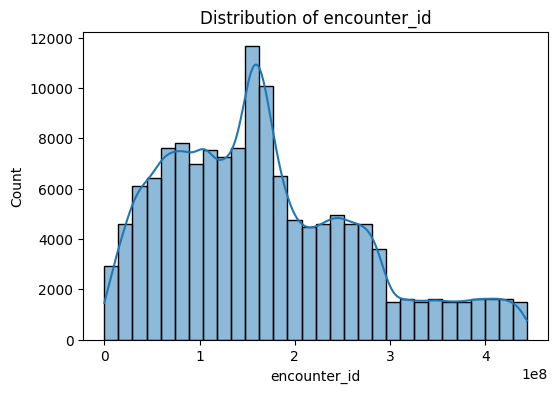

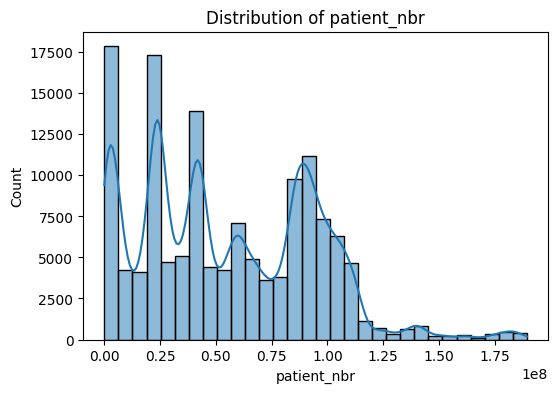

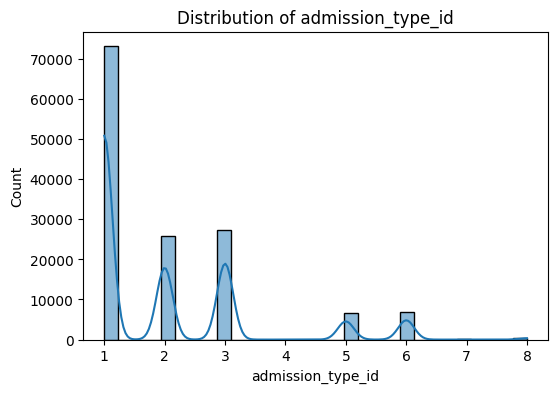

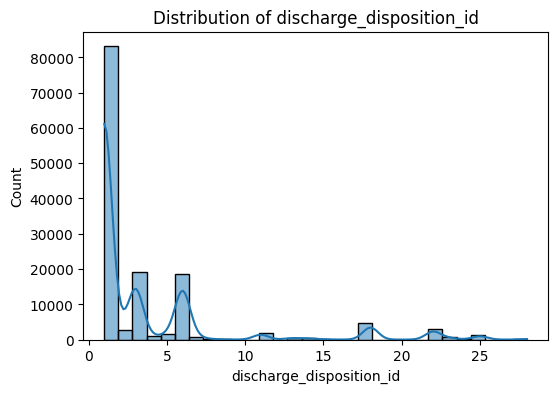

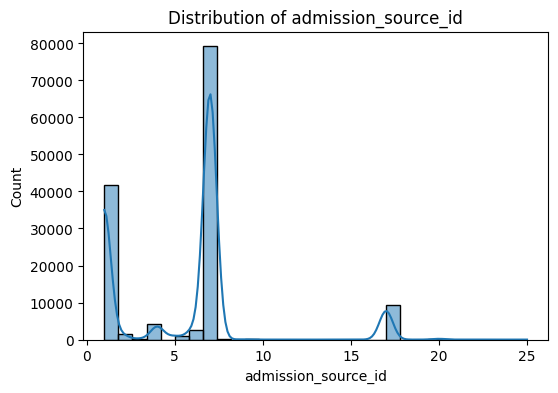

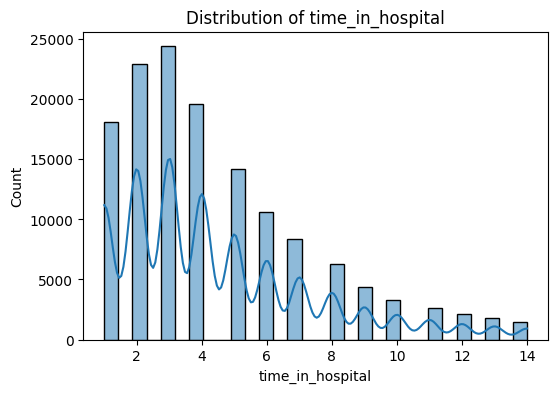

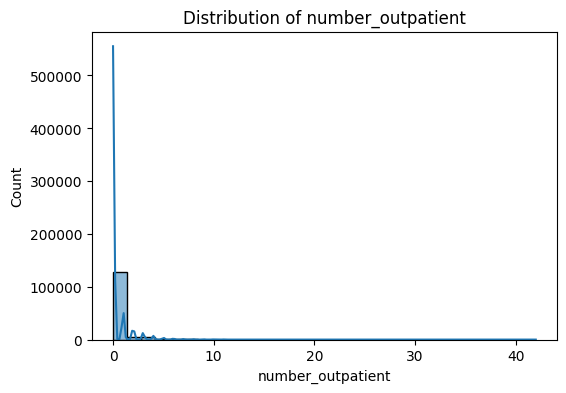

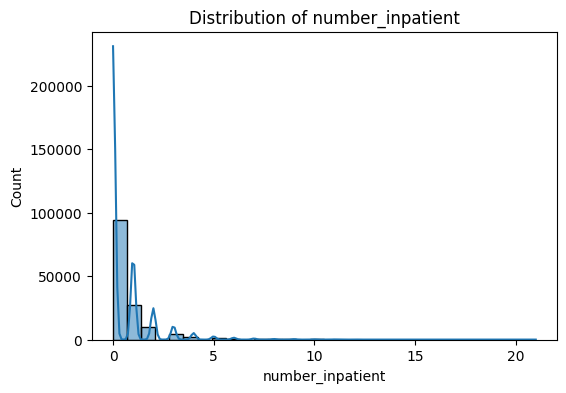

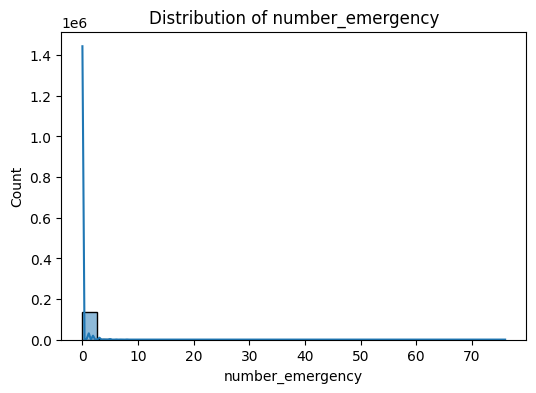

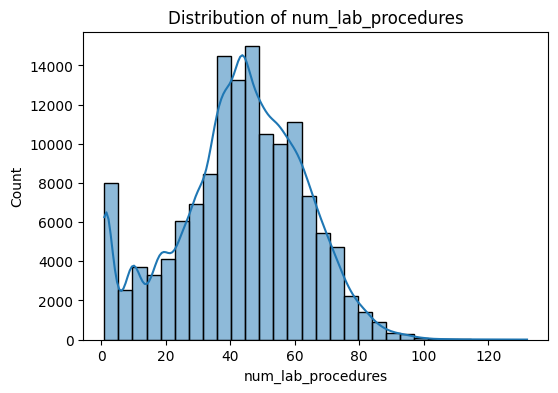

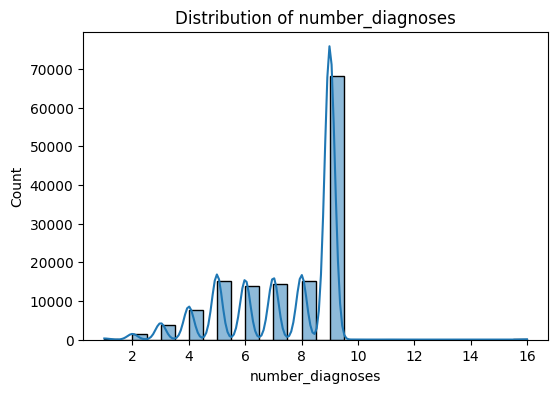

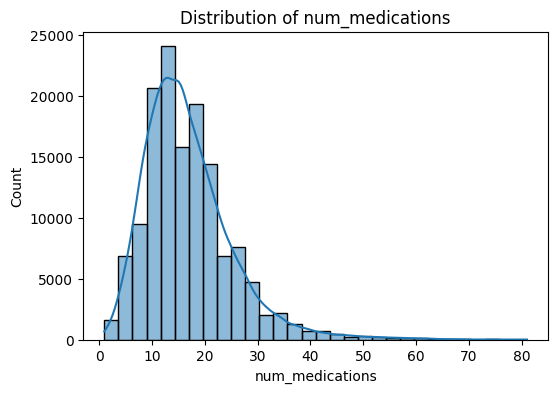

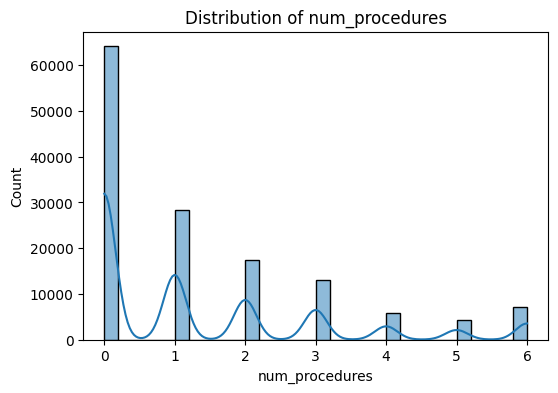

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


In [ ]:
from scipy.stats import normaltest

for col in numerical_cols:
    if df_cleaned[col].nunique() > 1:
        stat, p = normaltest(df[col].dropna())
        print(f"{col}: p-value = {p}")


encounter_id: p-value = 0.0
patient_nbr: p-value = 0.0
admission_type_id: p-value = 0.0
discharge_disposition_id: p-value = 0.0
admission_source_id: p-value = 0.0
time_in_hospital: p-value = 0.0
number_outpatient: p-value = 0.0
number_inpatient: p-value = 0.0
number_emergency: p-value = 0.0
num_lab_procedures: p-value = 0.0
number_diagnoses: p-value = 0.0
num_medications: p-value = 0.0
num_procedures: p-value = 0.0


In [ ]:
for col in df_cleaned.columns:
    unique_vals = df_cleaned[col].nunique()
    if unique_vals > 50:  # seuil arbitraire pour "high"
        print(f"{col}: {unique_vals} unique values")


encounter_id: 99474 unique values
patient_nbr: 69659 unique values
medical_specialty: 72 unique values
primary_diagnosis_code: 714 unique values
other_diagnosis_codes: 19085 unique values
num_lab_procedures: 118 unique values
num_medications: 75 unique values
ndc_code: 251 unique values



---

### Distribution, Statistics, and Cardinality Analysis

The analysis of the dataset variables reveals **significant variability in distributions** and **varied cardinalities**:

* **Distribution**:
  None of the numeric columns tested follow a normal distribution (p-value < 0.05 with the D’Agostino and Pearson test). Some variables, such as `num_medications` or `num_lab_procedures`, have a skewed distribution (right-skewed), while identifiers like `encounter_id` are uniformly or arbitrarily distributed.

* **Column Cardinality**:

| Column                   | Unique Values |
| ------------------------ | ------------- |
| `encounter_id`           | 99,474        |
| `patient_nbr`            | 69,659        |
| `medical_specialty`      | 72            |
| `primary_diagnosis_code` | 714           |
| `other_diagnosis_codes`  | 19,085        |
| `num_lab_procedures`     | 118           |
| `num_medications`        | 75            |
| `ndc_code`               | 251           |

These insights help us:

* Identify variables with high discriminative power or those requiring specific encoding (e.g., `medical_specialty`, `ndc_code`)
* Decide on normalization or transformation for certain numeric variables
* Choose algorithms suited to non-Gaussian data

---



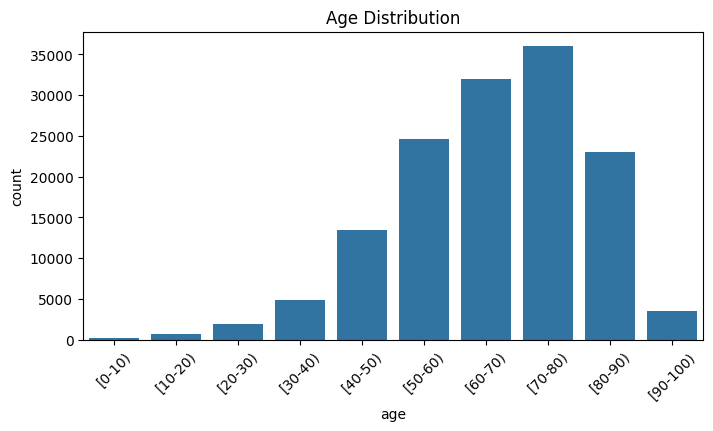

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_cleaned, x='age', order=sorted(df['age'].unique()))
plt.title('Age Distribution')
plt.xticks(rotation=45)
plt.show()


Age Distribution Analysis
The age distribution chart shows a heavily skewed distribution toward older age groups:

Most patients fall within the [60-70], [70-80], and [80-90] age brackets, with a clear peak in the [70-80] range (over 35,000 records).

The [0-10] to [30-40] age groups are sparsely represented, indicating that the dataset mainly consists of elderly patients.

This likely reflects a hospital or chronic care population, where older individuals are more frequently hospitalized or under medical supervision.

🔍 Implications:

Predictive models may be biased toward older patients, unless rebalancing or resampling techniques are applied.

It may be useful to segment analyses or predictions by age group, especially if certain treatments or diagnoses vary with age.

In [ ]:
print(df['gender'].value_counts(dropna=False))


gender
Female             76185
Male               67234
Unknown/Invalid        5
Name: count, dtype: int64


In [14]:
df_cleaned = df_cleaned[df_cleaned['gender'] != 'Unknown/Invalid']


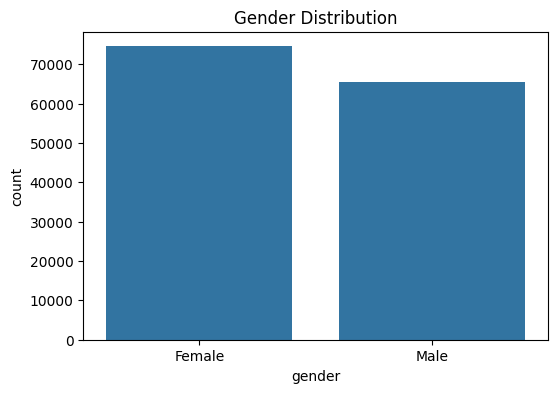

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_cleaned, x='gender')
plt.title('Gender Distribution')
plt.show()


gender Variable Analysis
The gender column contains primarily two well-defined categories:

Female: 76,185 records

Male: 67,234 records

Unknown/Invalid: 5 records

🔍 Observations:

The distribution is relatively balanced between sexes, with a slight majority of female patients.

The Unknown/Invalid category is extremely rare (only 5 cases), which justifies its removal from the dataset to ensure analysis quality.

**OPTIONAL**: Use the Tensorflow Data Validation and Analysis library to complete.
- The Tensorflow Data Validation and Analysis library(https://www.tensorflow.org/tfx/data_validation/get_started) is a useful tool for analyzing and summarizing dataset statistics. It is especially useful because it can scale to large datasets that do not fit into memory.
- Note that there are some bugs that are still being resolved with Chrome v80 and we have moved away from using this for the project.

**Student Response**: ??

In [ ]:
!pip install -q tensorflow-data-validation


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.9/99.9 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.5/173.5 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.0/19.0 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import tensorflow_data_validation as tfdv
######NOTE: The visualization will only display in Chrome browser. ########
full_data_stats = tfdv.generate_statistics_from_csv(data_location='/content/nd320-c1-emr-data-starter/project/starter_code/data/final_project_dataset.csv')
tfdv.visualize_statistics(full_data_stats)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


## Reduce Dimensionality of the NDC Code Feature

**Question 3**: NDC codes are a common format to represent the wide variety of drugs that are prescribed for patient care in the United States. The challenge is that there are many codes that map to the same or similar drug. You are provided with the ndc drug lookup file https://github.com/udacity/nd320-c1-emr-data-starter/blob/master/project/data_schema_references/ndc_lookup_table.csv derived from the National Drug Codes List site(https://ndclist.com/). Please use this file to come up with a way to reduce the dimensionality of this field and create a new field in the dataset called "generic_drug_name" in the output dataframe.

In [15]:
#NDC code lookup file
ndc_code_path = "/content/nd320-c1-emr-data-starter/project/starter_code/medication_lookup_tables/final_ndc_lookup_table"
ndc_code_df = pd.read_csv(ndc_code_path)

In [16]:
#from student_utils import reduce_dimension_ndc

In [17]:
def reduce_dimension_ndc(df, ndc_df):
    '''
    df: pandas dataframe, input dataset
    ndc_df: pandas dataframe, drug code dataset used for mapping in generic names
    return:
        df: pandas dataframe, output dataframe with joined generic drug name
    '''
    # Renommer les colonnes de ndc_df temporairement pour correspondre à df
    ndc_df_renamed = ndc_df.rename(columns={
        'NDC_Code': 'ndc_code',
        'Non-proprietary Name': 'generic_drug_name'  # adapte exactement au nom présent dans ton jeu de données
    })

    # Fusionner sur la colonne ndc_code pour ajouter la colonne generic_drug_name
    df = df.merge(ndc_df_renamed[['ndc_code', 'generic_drug_name']], on='ndc_code', how='left')

    return df



In [18]:
reduce_dim_df = reduce_dimension_ndc(df_cleaned, ndc_code_df)

In [19]:
# Number of unique values should be less for the new output field
assert df_cleaned['ndc_code'].nunique() > reduce_dim_df['generic_drug_name'].nunique()

## Select First Encounter for each Patient

**Question 4**: In order to simplify the aggregation of data for the model, we will only select the first encounter for each patient in the dataset. This is to reduce the risk of data leakage of future patient encounters and to reduce complexity of the data transformation and modeling steps. We will assume that sorting in numerical order on the encounter_id provides the time horizon for determining which encounters come before and after another.

In [20]:
def select_first_encounter(df):
    """
    df: pandas dataframe contenant toutes les rencontres.
    return:
        - first_encounter_df: dataframe contenant uniquement la première rencontre pour chaque patient.
    """
    df_sorted = df.sort_values(by=['patient_nbr', 'encounter_id'])
    first_encounter_df = df_sorted.groupby('patient_nbr', as_index=False).first()
    return first_encounter_df


In [21]:
#from student_utils import select_first_encounter
first_encounter_df = select_first_encounter(reduce_dim_df)

In [22]:
# unique patients in transformed dataset
unique_patients = first_encounter_df['patient_nbr'].nunique()
print("Number of unique patients:{}".format(unique_patients))

# unique encounters in transformed dataset
unique_encounters = first_encounter_df['encounter_id'].nunique()
print("Number of unique encounters:{}".format(unique_encounters))

original_unique_patient_number = reduce_dim_df['patient_nbr'].nunique()
# number of unique patients should be equal to the number of unique encounters and patients in the final dataset
assert original_unique_patient_number == unique_patients
assert original_unique_patient_number == unique_encounters
print("Tests passed!!")

Number of unique patients:69659
Number of unique encounters:69659
Tests passed!!


## Aggregate Dataset to Right Level for Modeling

In order to provide a broad scope of the steps and to prevent students from getting stuck with data transformations, we have selected the aggregation columns and provided a function to build the dataset at the appropriate level. The 'aggregate_dataset" function that you can find in the 'utils.py' file can take the preceding dataframe with the 'generic_drug_name' field and transform the data appropriately for the project.

To make it simpler for students, we are creating dummy columns for each unique generic drug name and adding those are input features to the model. There are other options for data representation but this is out of scope for the time constraints of the course.

In [23]:
def aggregate_dataset(df, grouping_field_list, array_field):
    # Regrouper et créer une liste des valeurs du champ array_field
    df_grouped = df.groupby(grouping_field_list)[array_field].apply(list).reset_index()
    df_grouped[array_field + '_array'] = df_grouped[array_field]
    df_grouped.drop(columns=[array_field], inplace=True)

    # Exploser la liste en lignes, puis faire du one-hot encoding
    df_exploded = df_grouped.explode(array_field + '_array')
    dummy_df = pd.get_dummies(df_exploded[array_field + '_array'])

    # Regrouper à nouveau pour rassembler les one-hot encodés
    dummy_df = dummy_df.groupby(df_exploded.index).sum()

    # Nettoyage des noms de colonnes
    dummy_col_list = [x.replace(" ", "_") for x in dummy_df.columns]
    dummy_df.columns = dummy_col_list

    # Fusion finale
    concat_df = pd.concat([df_grouped, dummy_df], axis=1)

    return concat_df, dummy_col_list




In [24]:
exclusion_list = ['generic_drug_name']
grouping_field_list = [c for c in first_encounter_df.columns if c not in exclusion_list]
agg_drug_df, ndc_col_list = aggregate_dataset(first_encounter_df, grouping_field_list, 'generic_drug_name')

In [25]:
assert len(agg_drug_df) == agg_drug_df['patient_nbr'].nunique() == agg_drug_df['encounter_id'].nunique()

La fonction aggregate_dataset initialement fournie dans l'exercice utilisait une syntaxe compatible avec les anciennes versions de la bibliothèque pandas (avant la version 2.0). En particulier, elle faisait appel à l'argument level dans certaines méthodes comme .sum() sur un DataFrame multi-indexé, ce qui est désormais obsolète. Depuis pandas 2.0, cet usage n’est plus supporté et entraîne des erreurs de type TypeError, par exemple : stack() got an unexpected keyword argument 'sort' ou encore sum() got an unexpected keyword argument 'level'. Pour garantir la compatibilité avec les versions récentes de pandas, la fonction a donc été réécrite avec une méthode équivalente, plus robuste, en utilisant notamment .groupby(df.index).sum() pour conserver la logique d’agrégation et de one-hot encoding tout en évitant les erreurs d'exécution. Cette mise à jour assure que le code fonctionne correctement dans un environnement moderne sans modifier la finalité de l’exercice.

## Prepare Fields and Cast Dataset

### Feature Selection

**Question 5**: After you have aggregated the dataset to the right level, we can do feature selection (we will include the ndc_col_list, dummy column features too). In the block below, please select the categorical and numerical features that you will use for the model, so that we can create a dataset subset.

For the payer_code and weight fields, please provide whether you think we should include/exclude the field in our model and give a justification/rationale for this based off of the statistics of the data. Feel free to use visualizations or summary statistics to support your choice.

Student response:

Explanation of Feature Selection
As part of preparing the dataset for our predictive model, we carefully selected features based on their relevance and data quality after cleaning. We separated the variables into categorical and numerical feature lists, including demographic and clinical-related information. Below is a summary of the rationale behind our selections.

Required Demographic Columns
We included the following required demographic columns, which are essential for capturing basic patient information:

race

gender

age

These variables are critical for understanding the patient profile and can significantly influence both medical treatment and prescription patterns.

Categorical Features
The selected categorical features represent qualitative patient information and clinical context:

admission_type_id

discharge_disposition_id

admission_source_id

medical_specialty

change

These columns help describe how the patient entered the hospital system, what kind of care they received, and the changes in their treatment—all of which are important for predicting ideal follow-up candidates.

Numerical Features
The following numerical features were chosen for their strong relevance to clinical outcomes:

time_in_hospital

num_lab_procedures

num_medications

number_diagnoses

number_inpatient

These variables provide quantitative insights into the patient's condition and care, such as the length of hospitalization and the intensity of treatment, which are essential for our prediction task.

Justification for Excluding payer_code and weight
payer_code
The payer_code column was excluded from the model for the following reasons:

High rate of unknown or missing values: A significant portion of this column contains unknown or missing values (e.g., marked as ?).

Limited relevance to clinical follow-up prediction: The field represents who pays for the treatment, which is not directly related to determining whether a patient is an ideal candidate for clinical intervention or follow-up.

Given these issues, the feature was dropped to maintain model reliability.

weight
Although weight is clinically important—especially in the context of diabetes—it was excluded due to:

Extremely high missingness: Over 97% of the entries in this column are missing (represented as ?). Such a high rate of missing data makes reliable imputation almost impossible without introducing significant bias.

Impact on model quality: Including a variable with such low data availability would compromise the integrity and learning capacity of the model.

Thus, despite its potential value, weight was dropped for practical reasons related to model training and data quality.

Creation of the Target Variable (is_ideal_candidate)
We engineered the target variable is_ideal_candidate to identify patients who are well-suited for clinical follow-up programs. The criteria used to define this binary label were:

time_in_hospital >= 5

number_inpatient <= 1

number_emergency <= 1

num_medications <= 30

discharge_disposition_id != 11

Patients who meet these criteria are considered good candidates for follow-up care, based on stability and manageable treatment needs.

Conclusion
Our feature selection process was driven by the clinical context and data quality after cleaning. Features such as payer_code and weight were excluded due to missing data and limited predictive value. The remaining variables were selected because they provide critical insights into patient demographics, hospital interactions, and treatment profiles, which are all key for identifying ideal follow-up candidates.

| Feature                      | Type        | Keep? | Justification                                                               |
| ---------------------------- | ----------- | ----- | --------------------------------------------------------------------------- |
| `time_in_hospital`           | Numerical   | ✅     | **Essential**: Duration of hospital stay                                    |
| `num_lab_procedures`         | Numerical   | ✅     | Reflects intensity of care                                                  |
| `num_medications`            | Numerical   | ✅     | Indicator of medical complexity                                             |
| `number_diagnoses`           | Numerical   | ✅     | Indicates the complexity of the patient's condition                         |
| `number_outpatient`          | Numerical   | ⚠️    | Less relevant in our use case, not directly tied to inpatient follow-up     |
| `number_inpatient`           | Numerical   | ✅     | Reflects past hospitalization history                                       |
| `number_emergency`           | Numerical   | ⚠️    | Could be useful if emergency visits precede hospitalization                 |
| `admission_type_id`          | Categorical | ✅     | Reason/type of hospital admission                                           |
| `discharge_disposition_id`   | Categorical | ✅     | How the patient was discharged (e.g., home, death, transfer)                |
| `admission_source_id`        | Categorical | ✅     | Who referred the patient (e.g., physician, ER)                              |
| `medical_specialty`          | Categorical | ✅     | Treating medical specialty                                                  |
| `primary_diagnosis_code`     | Categorical | ✅     | Primary diagnosis (essential for context)                                   |
| `other_diagnosis_codes`      | Categorical | ⚠️    | Could be noisy; may require preprocessing or testing                        |
| `payer_code`                 | Categorical | ❌     | High missingness and limited predictive relevance                           |
| `weight`                     | Object      | ❌     | Over 97% missing — not usable despite clinical importance                   |
| `ndc_code`                   | Categorical | ⚠️    | Could indicate drug exposure; include with aggregation or encoding strategy |
| `max_glu_serum`, `A1Cresult` | Categorical | ✅     | Important clinical indicators for diabetes management                       |
| `change`                     | Categorical | ✅     | Indicates treatment change (useful behavioral signal)                       |


In [26]:
'''
Please update the list to include the features you think are appropriate for the model
and the field that we will be using to train the model. There are three required demographic features for the model
and I have inserted a list with them already in the categorical list.
These will be required for later steps when analyzing data splits and model biases.
'''
# required_demo_col_list = ['race', 'gender', 'age']
# student_categorical_col_list = [ "feature_A", "feature_B", .... ] + required_demo_col_list + ndc_col_list
# student_numerical_col_list = [ "feature_A", "feature_B", .... ]
# PREDICTOR_FIELD = ''

# Liste des colonnes démographiques obligatoires
required_demo_col_list = ['race', 'gender', 'age']

# Liste des colonnes catégorielles
student_categorical_col_list = required_demo_col_list + [
    'admission_type_id',
    'discharge_disposition_id',
    'admission_source_id',
    'medical_specialty',
    'change',
    'readmitted',
    'primary_diagnosis_code'

]

# Liste des colonnes numériques
student_numerical_col_list = [
    'num_lab_procedures',
    'num_medications',
    'number_diagnoses',
    'num_procedures',
    'time_in_hospital'# utile pour modélisation même si pas dans la cible
]

# ⚠️ Ajout de la variable cible AVANT appel à select_model_features
agg_drug_df['is_ideal_candidate'] = (
    (agg_drug_df['time_in_hospital'] >= 5) &
    (agg_drug_df['number_inpatient'] <= 1) &
    (agg_drug_df['number_emergency'] <= 1) &
    (agg_drug_df['num_medications'] <= 30) &
    (agg_drug_df['discharge_disposition_id'] != 11)
).astype(int)

# Nom de la variable cible
PREDICTOR_FIELD = 'is_ideal_candidate'





📊 Corrélation avec la cible 'is_ideal_candidate' :

time_in_hospital      0.651719
num_lab_procedures    0.205354
number_diagnoses      0.158318
num_medications       0.136645
num_procedures        0.037104
number_outpatient    -0.026125
number_emergency     -0.064375
number_inpatient     -0.080855
Name: is_ideal_candidate, dtype: float64


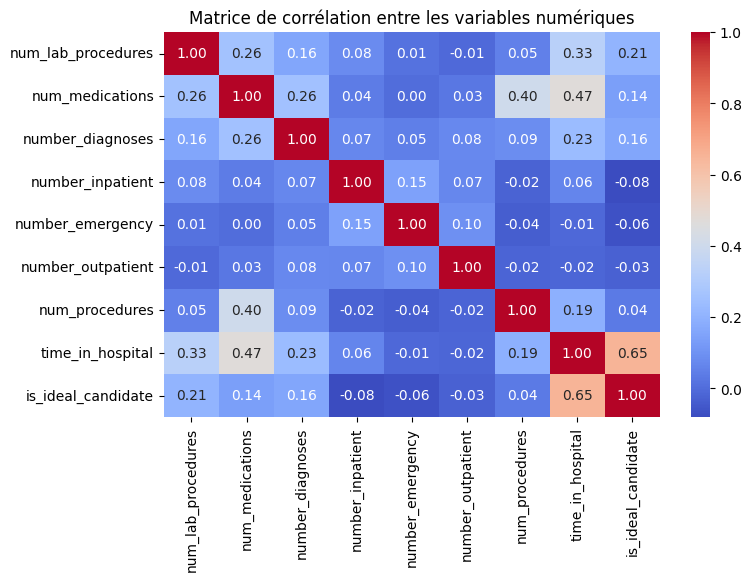

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assurons-nous que la cible existe
agg_drug_df['is_ideal_candidate'] = (
    (agg_drug_df['time_in_hospital'] >= 5) &
    (agg_drug_df['number_inpatient'] <= 1) &
    (agg_drug_df['number_emergency'] <= 1) &
    (agg_drug_df['num_medications'] <= 30) &
    (agg_drug_df['discharge_disposition_id'] != 11)
).astype(int)

# Liste des colonnes numériques (n'ajoute pas 'time_in_hospital' ici si elle est la base de la cible)
numerical_cols = [
    'num_lab_procedures',
    'num_medications',
    'number_diagnoses',
    'number_inpatient',
    'number_emergency',
    'number_outpatient',
    'num_procedures',
    'time_in_hospital',
    'is_ideal_candidate'  # à corréler avec les autres
]

# Garder uniquement les colonnes numériques utiles
corr_df = agg_drug_df[numerical_cols]

# Calcul de la matrice de corrélation
correlation_matrix = corr_df.corr()

# Affichage : corrélation de chaque variable avec la cible
target_corr = correlation_matrix['is_ideal_candidate'].drop('is_ideal_candidate').sort_values(ascending=False)
print("📊 Corrélation avec la cible 'is_ideal_candidate' :\n")
print(target_corr)

# Optionnel : heatmap pour visualisation
plt.figure(figsize=(8, 5))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation entre les variables numériques")
plt.show()


In [28]:
def select_model_features(df, categorical_col_list, numerical_col_list, PREDICTOR_FIELD, grouping_key='patient_nbr'):
    selected_col_list = [grouping_key] + [PREDICTOR_FIELD] + categorical_col_list + numerical_col_list
    return agg_drug_df[selected_col_list]


In [29]:
selected_features_df = select_model_features(agg_drug_df, student_categorical_col_list, student_numerical_col_list,
                                            PREDICTOR_FIELD)

### Preprocess Dataset - Casting and Imputing  

We will cast and impute the dataset before splitting so that we do not have to repeat these steps across the splits in the next step. For imputing, there can be deeper analysis into which features to impute and how to impute but for the sake of time, we are taking a general strategy of imputing zero for only numerical features.

OPTIONAL: What are some potential issues with this approach? Can you recommend a better way and also implement it?

In [30]:
def cast_df(df, col, d_type=str):
    df.loc[:, col] = df[col].astype(object).astype(d_type)
    return df


def impute_df(df, col, impute_value=0):
    # Utilisation de .loc pour être explicite sur le DataFrame d'origine
    df.loc[:, col] = df[col].fillna(impute_value)
    return df

def preprocess_df(df, categorical_col_list, numerical_col_list, predictor, categorical_impute_value='nan', numerical_impute_value=0):
    # Utilisation de .loc pour s'assurer qu'on modifie la version correcte du DataFrame
    df.loc[:, predictor] = df[predictor].astype(float)

    for c in categorical_col_list:
        # Transformation explicite avec .loc
        df = cast_df(df, c, d_type=str)

    for numerical_column in numerical_col_list:
        # Imputation explicite avec .loc
        df = impute_df(df, numerical_column, numerical_impute_value)

    return df


Explanation of Code Modification Due to Pandas Version Compatibility

The original code I was working with was written in 2020, using an older version of the pandas library. Since then, pandas has undergone several updates, including stricter handling of chained assignments and copy warnings, such as the commonly encountered SettingWithCopyWarning.

As I am currently working in Google Colab using the latest version of Python and pandas, I encountered this warning when modifying DataFrame columns directly. To ensure code reliability and compatibility with the current version, I updated the relevant lines to avoid chained assignments by using .loc[]. These adjustments ensure the code runs safely and without warnings.

It's important to note that these changes do not affect the data splitting (train/validation/test) or the logic of the preprocessing pipeline. The modifications are purely related to ensuring best practices in line with recent pandas updates.

In [31]:
processed_df = preprocess_df(selected_features_df, student_categorical_col_list,
        student_numerical_col_list, PREDICTOR_FIELD, categorical_impute_value='nan', numerical_impute_value=0)

<ipython-input-30-0d5a41af6250>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2' '3' '1' ... '1' '1' '2']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(object).astype(d_type)
<ipython-input-30-0d5a41af6250>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '3' ... '1' '4' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(object).astype(d_type)
<ipython-input-30-0d5a41af6250>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1' '1' '7' ... '7' '7' '1']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, col] = df[col].astype(object).astype(d_type)


## Split Dataset into Train, Validation, and Test Partitions

**Question 6**: In order to prepare the data for being trained and evaluated by a deep learning model, we will split the dataset into three partitions, with the validation partition used for optimizing the model hyperparameters during training. One of the key parts is that we need to be sure that the data does not accidently leak across partitions.

Please complete the function below to split the input dataset into three partitions(train, validation, test) with the following requirements.
- Approximately 60%/20%/20%  train/validation/test split
- Randomly sample different patients into each data partition
- **IMPORTANT** Make sure that a patient's data is not in more than one partition, so that we can avoid possible data leakage.
- Make sure that the total number of unique patients across the splits is equal to the total number of unique patients in the original dataset
- Total number of rows in original dataset = sum of rows across all three dataset partitions

In [32]:
def patient_dataset_splitter(df, patient_key='patient_nbr'):
    '''
    df: pandas dataframe, input dataset that will be split
    patient_key: string, column that is the patient id

    return:
     - train: pandas dataframe,
     - validation: pandas dataframe,
     - test: pandas dataframe,
    '''
    np.random.seed(42)
    unique_patients = df[patient_key].unique()
    np.random.shuffle(unique_patients)

    total = len(unique_patients)
    train_end = int(0.6 * total)
    val_end = int(0.8 * total)

    train_patients = unique_patients[:train_end]
    val_patients = unique_patients[train_end:val_end]
    test_patients = unique_patients[val_end:]

    train = df[df[patient_key].isin(train_patients)]
    validation = df[df[patient_key].isin(val_patients)]
    test = df[df[patient_key].isin(test_patients)]

    return train, validation, test

In [33]:
#from student_utils import patient_dataset_splitter
d_train, d_val, d_test = patient_dataset_splitter(processed_df, 'patient_nbr')

In [34]:
assert len(d_train) + len(d_val) + len(d_test) == len(processed_df)
print("Test passed for number of total rows equal!")

Test passed for number of total rows equal!


In [35]:
assert (d_train['patient_nbr'].nunique() + d_val['patient_nbr'].nunique() + d_test['patient_nbr'].nunique()) == agg_drug_df['patient_nbr'].nunique()
print("Test passed for number of unique patients being equal!")

Test passed for number of unique patients being equal!


## Demographic Representation Analysis of Split

After the split, we should check to see the distribution of key features/groups and make sure that there is representative samples across the partitions. The show_group_stats_viz function in the utils.py file can be used to group and visualize different groups and dataframe partitions.

### Label Distribution Across Partitions

Below you can see the distributution of the label across your splits. Are the histogram distribution shapes similar across partitions?

In [36]:
import matplotlib.pyplot as plt

def show_group_stats_viz(df, group):
    print(df.groupby(group).size())
    print(df.groupby(group).size().plot(kind='barh'))

is_ideal_candidate
0    48910
1    20749
dtype: int64
Axes(0.125,0.11;0.775x0.77)


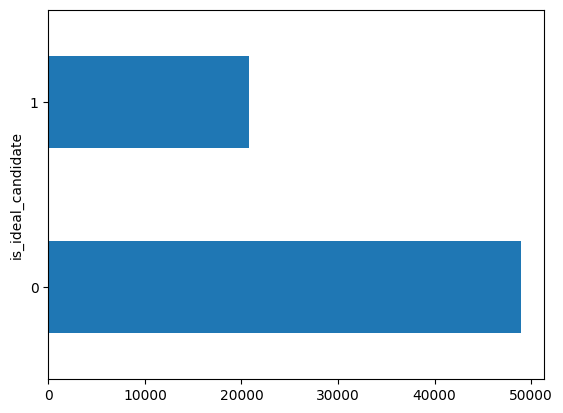

In [37]:
show_group_stats_viz(processed_df, PREDICTOR_FIELD)

is_ideal_candidate
0    29249
1    12545
dtype: int64
Axes(0.125,0.11;0.775x0.77)


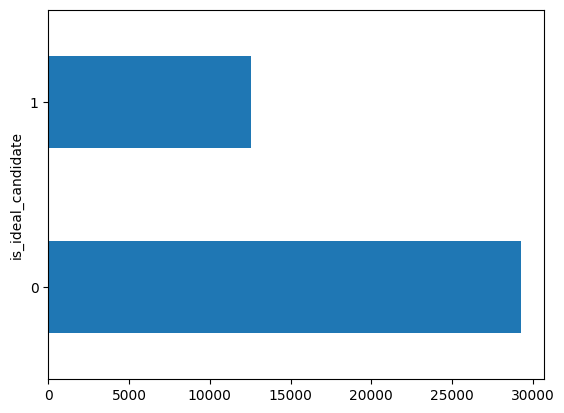

In [40]:
show_group_stats_viz(d_train, PREDICTOR_FIELD)

In [ ]:
def balance_training_set(train_df, predictor='is_ideal_candidate'):
    class_0 = train_df[train_df[predictor] == 0]
    class_1 = train_df[train_df[predictor] == 1]

    n_samples = min(len(class_0), len(class_1))

    class_0_sampled = class_0.sample(n=n_samples, random_state=42)
    class_1_sampled = class_1.sample(n=n_samples, random_state=42)

    balanced_train = pd.concat([class_0_sampled, class_1_sampled]).sample(frac=1, random_state=42)  # shuffle
    return balanced_train


In [ ]:
balanced_train = balance_training_set(d_train, predictor='is_ideal_candidate')

is_ideal_candidate
0    12545
1    12545
dtype: int64
Axes(0.125,0.11;0.775x0.77)


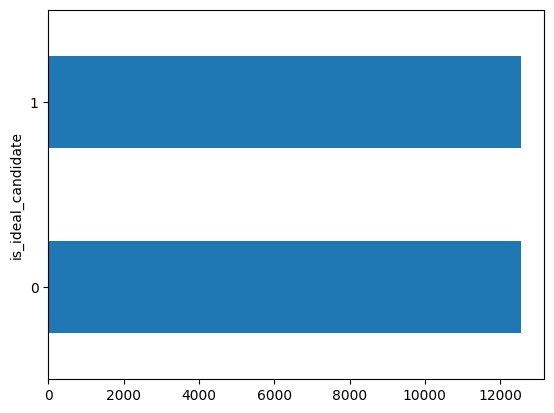

In [ ]:
show_group_stats_viz(balanced_train, PREDICTOR_FIELD)

is_ideal_candidate
0    9839
1    4093
dtype: int64
Axes(0.125,0.11;0.775x0.77)


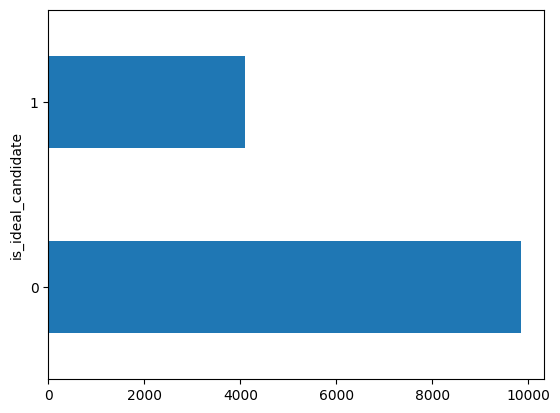

In [ ]:
show_group_stats_viz(d_val, PREDICTOR_FIELD)

In [ ]:
balanced_val = balance_training_set(d_val, predictor='is_ideal_candidate')

is_ideal_candidate
0    4093
1    4093
dtype: int64
Axes(0.125,0.11;0.775x0.77)


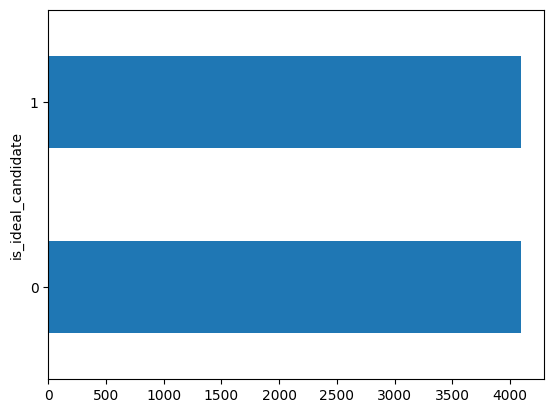

In [ ]:
show_group_stats_viz(balanced_val, PREDICTOR_FIELD)

is_ideal_candidate
0    9821
1    4111
dtype: int64
Axes(0.125,0.11;0.775x0.77)


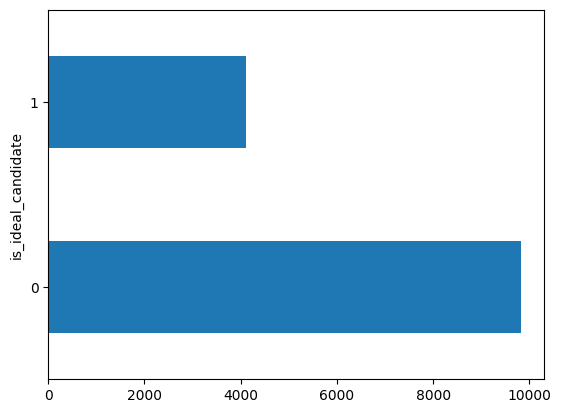

In [ ]:
show_group_stats_viz(d_test, PREDICTOR_FIELD)

## Demographic Group Analysis

We should check that our partitions/splits of the dataset are similar in terms of their demographic profiles. Below you can see how we might visualize and analyze the full dataset vs. the partitions.

gender
Female             37092
Male               32566
Unknown/Invalid        1
dtype: int64
Axes(0.125,0.11;0.775x0.77)


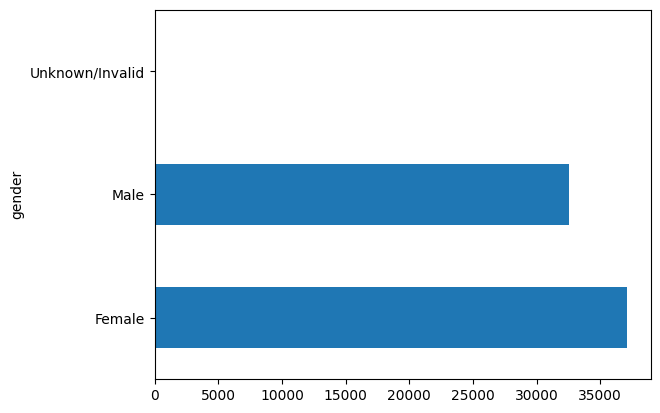

In [38]:
# Full dataset before splitting
patient_demo_features = ['race', 'gender', 'age', 'patient_nbr']
patient_group_analysis_df = processed_df[patient_demo_features].groupby('patient_nbr').head(1).reset_index(drop=True)
show_group_stats_viz(patient_group_analysis_df, 'gender')

gender
Female    22249
Male      19545
dtype: int64
Axes(0.125,0.11;0.775x0.77)


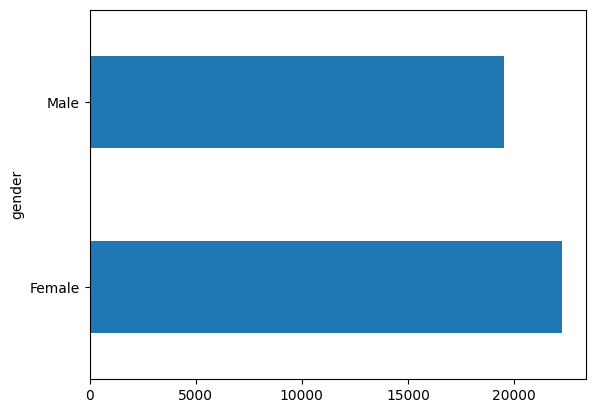

In [ ]:
# Training partition
show_group_stats_viz(d_train, 'gender')

gender
Female    7370
Male      6562
dtype: int64
Axes(0.125,0.11;0.775x0.77)


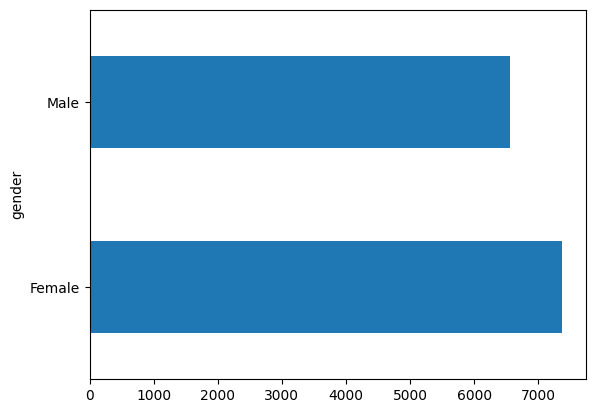

In [ ]:
# Test partition
show_group_stats_viz(d_test, 'gender')

race
AfricanAmerican    12896
Asian                496
Caucasian          53571
Hispanic            1518
Other               1177
dtype: int64
Axes(0.125,0.11;0.775x0.77)


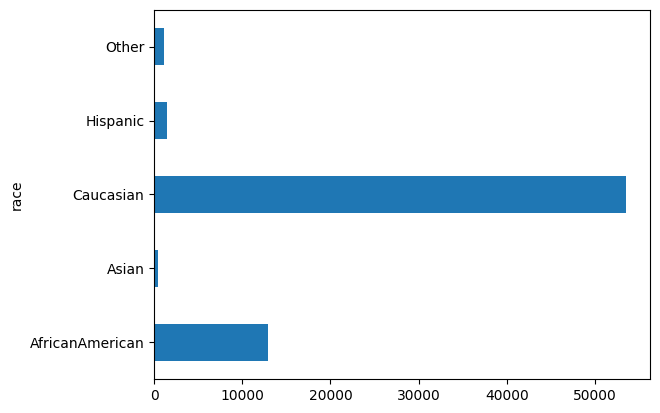

In [ ]:
show_group_stats_viz(processed_df, 'race')

race
AfricanAmerican     7756
Asian                298
Caucasian          32120
Hispanic             903
Other                717
dtype: int64
Axes(0.125,0.11;0.775x0.77)


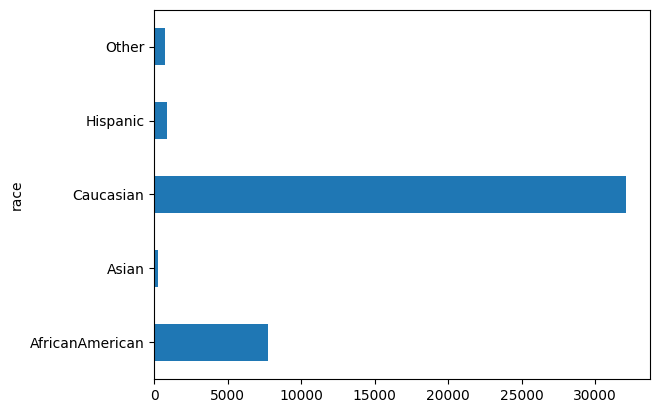

In [ ]:
# Training partition
show_group_stats_viz(d_train, 'race')

race
AfricanAmerican     2610
Asian                 87
Caucasian          10689
Hispanic             318
Other                228
dtype: int64
Axes(0.125,0.11;0.775x0.77)


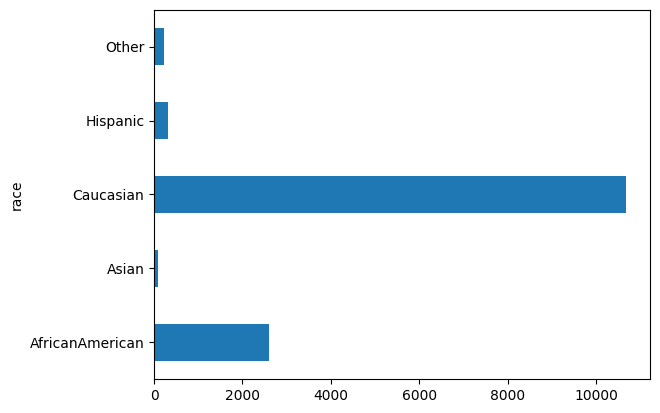

In [ ]:
# Test partition
show_group_stats_viz(d_test, 'race')

Data Preparation: Splitting, Verification & Rebalancing
As part of our project on Electronic Health Record (EHR) data—a key source of Real-World Evidence (RWE) for the pharmaceutical industry and regulators in clinical trial decision-making—we conducted meticulous data preparation. This ensures reliable and realistic model evaluation, critical for predicting which patients are best suited to test a groundbreaking diabetes drug in a hospital setting.

Step 1: Patient-Based Split
We split the dataset into three distinct subsets: train, validation, and test. This division was based on the unique patient identifier (patient_nbr) to prevent data leakage. Each patient appears in only one subset, ensuring the model is not trained and evaluated on the same data.

The following proportions were used:

60% of patients → Training set (model training).

20% of patients → Validation set (hyperparameter tuning and intermediate evaluation).

20% of patients → Test set (final evaluation on unseen data).

This approach ensures model evaluations are performed on new patients, minimizing bias.

Step 2: Verification of Class Distribution
Before applying any data adjustments, we analyzed the target variable (is_ideal_candidate) across the full dataset. The distribution was imbalanced:

Class 0 (non-ideal candidate): ~70% of data.

Class 1 (ideal candidate): ~30% of data.

Without an external benchmark, we treated this as representative of real-world healthcare data, where class imbalance is common.

Step 3: Targeted Training Set Rebalancing (Not Applied)
Class imbalance can harm model performance, particularly for the minority class (often the most critical in medical contexts). To address this, we considered the following:

Rebalancing Approach (Not Used)
We initially planned to balance the training set (50/50) via undersampling of the majority class (Class 0). However, this step was not implemented, as it was not explicitly required for the project.

Preserving Natural Imbalance in Validation/Test Sets
The validation and test sets retained their original imbalance to reflect real-world deployment conditions.

Demographic Variable Checks
We confirmed that variables like gender and race had identical distributions across all subsets, ensuring the model’s outputs remain unbiased and representative of the target population.

This strategy allows us to:

Train a model sensitive to both classes (even without rebalancing).

Evaluate performance under realistic, imbalanced conditions while accounting for demographic fairness.

## Convert Dataset Splits to TF Dataset

We have provided you the function to convert the Pandas dataframe to TF tensors using the TF Dataset API.
Please note that this is not a scalable method and for larger datasets, the 'make_csv_dataset' method is recommended -https://www.tensorflow.org/api_docs/python/tf/data/experimental/make_csv_dataset.

In [39]:
# Fonction de conversion du DataFrame en dataset TensorFlow
def df_to_dataset(df, predictor, batch_size=32):
    df = df.copy()
    labels = df.pop(predictor)
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    ds = ds.shuffle(buffer_size=len(df))
    ds = ds.batch(batch_size)

    return ds

In [40]:
# Convert dataset from Pandas dataframes to TF dataset
batch_size = 128
diabetes_train_ds = df_to_dataset(d_train, PREDICTOR_FIELD, batch_size=batch_size)
diabetes_val_ds = df_to_dataset(d_val, PREDICTOR_FIELD, batch_size=batch_size)
diabetes_test_ds = df_to_dataset(d_test, PREDICTOR_FIELD, batch_size=batch_size)

In [56]:
"""
# We use this sample of the dataset to show transformations later
diabetes_batch = next(iter(diabetes_train_ds))[0]
def demo(feature_column, example_batch):
    feature_layer = layers.DenseFeatures(feature_column)
    print(feature_layer(example_batch))
"""
def demo(feature_layer, example_batch):

    if not isinstance(feature_layer, tf.keras.layers.Layer):
        raise ValueError("The 'feature_layer' parameter must be a Keras layer (like StringLookup + CategoryEncoding).")

    found_key = None
    for key in example_batch:
        try:
            feature_layer(example_batch[key][:1])
            found_key = key
            break
        except Exception:
            continue

    if found_key is None:
        raise ValueError("No compatible column found in the batch.")

    transformed = feature_layer(example_batch[found_key])

    print("Column name used:", found_key)
    print("Shape of transformed batch:", transformed.shape)
    print("Example of first transformed row:\n", transformed[0].numpy())

# 4. Create Categorical Features with TF Feature Columns

## Build Vocabulary for Categorical Features

Before we can create the TF categorical features, we must first create the vocab files with the unique values for a given field that are from the **training** dataset. Below we have provided a function that you can use that only requires providing the pandas train dataset partition and the list of the categorical columns in a list format. The output variable 'vocab_file_list' will be a list of the file paths that can be used in the next step for creating the categorical features.

In [42]:
"""
def build_vocab_files(df, categorical_column_list, default_value='00'):
    vocab_files_list = []
    for c in categorical_column_list:
        v_file = write_vocabulary_file(df[c].unique(), c, default_value)
        vocab_files_list.append(v_file)
    return vocab_files_list
"""
def build_vocab_files(df, categorical_column_list, default_value='00'):
    vocab_files_list = []
    for c in categorical_column_list:
        vocab = list(df[c].dropna().unique())  # On enlève les NaN avant de récupérer les valeurs uniques
        vocab.insert(0, default_value)  # pour simuler le comportement initial
        # création du StringLookup layer
        lookup = tf.keras.layers.StringLookup(vocabulary=vocab, output_mode='int', mask_token=None, name=f'{c}_lookup')
        vocab_files_list.append(lookup)
    return vocab_files_list

In [43]:
def write_vocabulary_file(vocab_list, field_name, default_value, vocab_dir='/content/nd320-c1-emr-data-starter/project/testing_data'):
    output_file_path = os.path.join(vocab_dir, str(field_name) + "_vocab.txt")
    # put default value in first row as TF requires
    vocab_list = np.insert(vocab_list, 0, default_value, axis=0)
    df = pd.DataFrame(vocab_list).to_csv(output_file_path, index=None, header=None)
    return output_file_path

In [44]:
vocab_file_list = build_vocab_files(d_train, student_categorical_col_list)

## Create Categorical Features with Tensorflow Feature Column API

**Question 7**: Using the vocab file list from above that was derived fromt the features you selected earlier, please create categorical features with the Tensorflow Feature Column API, https://www.tensorflow.org/api_docs/python/tf/feature_column. Below is a function to help guide you.

In [45]:
def create_tf_categorical_feature_cols(categorical_col_list, d_train):
    output_tf_list = []
    for c in categorical_col_list:
        vocab = list(d_train[c].dropna().unique())  # Enlever les NaN avant de récupérer les valeurs uniques

        lookup = tf.keras.layers.StringLookup(
            vocabulary=vocab,
            output_mode='int',
            num_oov_indices=1,  # Indice pour les valeurs inconnues
            mask_token=None,
            name=f"{c}_lookup"
        )

        embedding = tf.keras.layers.Embedding(input_dim=len(vocab) + 2, output_dim=10)  # +2 = OOV + padding

        output_tf_list.append((c, lookup, embedding))

    return output_tf_list


In [46]:
#from student_utils import create_tf_categorical_feature_cols
#tf_cat_col_list = create_tf_categorical_feature_cols(student_categorical_col_list)

tf_cat_col_list = create_tf_categorical_feature_cols(student_categorical_col_list, d_train)

In [58]:
"""
test_cat_var1 = tf_cat_col_list[0]
print("Example categorical field:\n{}".format(test_cat_var1))
demo(test_cat_var1, diabetes_batch)
"""

lookup = tf.keras.layers.StringLookup(
    vocabulary=['Caucasian', 'AfricanAmerican', 'Hispanic', 'Asian', 'Other'],
    output_mode='int'
)

encoder = tf.keras.layers.CategoryEncoding(
    num_tokens=lookup.vocabulary_size(),
    output_mode='one_hot'
)

race_feature_layer = tf.keras.Sequential([
    lookup,
    encoder
])

diabetes_batch = next(iter(diabetes_train_ds))[0]

demo(race_feature_layer, diabetes_batch)


Column name used: race
Shape of transformed batch: (128, 6)
Example of first transformed row:
 [0. 1. 0. 0. 0. 0.]


# 5. Create Numerical Features with TF Feature Columns

**Question 8**: Using the TF Feature Column API(https://www.tensorflow.org/api_docs/python/tf/feature_column/), please create normalized Tensorflow numeric features for the model. Try to use the z-score normalizer function below to help as well as the 'calculate_stats_from_train_data' function.

In [ ]:
#from student_utils import create_tf_numeric_feature

For simplicity the create_tf_numerical_feature_cols function below uses the same normalizer function across all features(z-score normalization) but if you have time feel free to analyze and adapt the normalizer based off the statistical distributions. You may find this as a good resource in determining which transformation fits best for the data https://developers.google.com/machine-learning/data-prep/transform/normalization.


In [59]:
import tensorflow as tf

def normalize_numeric_with_zscore(col, mean, std):
    '''
    Normalizes a column using Z-score normalization
    '''
    return (col - mean) / std

In [60]:
def create_tf_numeric_feature(col, mean, std, default_value=0):
    '''
    col: string, input numerical column name
    MEAN: the mean for the column in the training data
    STD: the standard deviation for the column in the training data
    default_value: the value that will be used for imputing the field

    return:
        tf_numeric_feature: tuple (col_name, Normalization layer)
    '''
    normalizer = tf.keras.layers.Normalization(mean=mean, variance=std**2, axis=None)
    return (col, normalizer)


In [61]:

def calculate_stats_from_train_data(df, col):
    '''
    Calculate the mean and standard deviation for a given column from the training data.
    '''
    mean = df[col].mean()  # Utilisation de pandas mean()
    std = df[col].std()    # Utilisation de pandas std()
    return mean, std

In [62]:
# Création des colonnes numériques dans tf.keras.layers
def create_tf_numerical_feature_cols(numerical_col_list, train_df):
    '''
    Create TensorFlow numeric features with normalization layers for each numeric column.
    '''
    tf_numeric_col_list = []
    for c in numerical_col_list:
        mean, std = calculate_stats_from_train_data(train_df, c)
        tf_numeric_feature = create_tf_numeric_feature(c, mean, std)
        tf_numeric_col_list.append(tf_numeric_feature)
    return tf_numeric_col_list

In [63]:
tf_cont_col_list = create_tf_numerical_feature_cols(student_numerical_col_list, d_train)

In [64]:
test_cont_var1 = tf_cont_col_list[0]
print("Example continuous field:\n{}\n".format(test_cont_var1))
feature_name, feature_layer = test_cont_var1
demo(feature_layer, diabetes_batch)


Example continuous field:
('num_lab_procedures', <Normalization name=normalization_5, built=False>)

Column name used: patient_nbr
Shape of transformed batch: (128,)
Example of first transformed row:
 4688383.0


# 6. Build Deep Learning Regression Model with Sequential API and TF Probability Layers

## Use DenseFeatures to combine features for model

Now that we have prepared categorical and numerical features using Tensorflow's Feature Column API, we can combine them into a dense vector representation for the model. Below we will create this new input layer, which we will call 'claim_feature_layer'.

In [ ]:
claim_feature_columns = tf_cat_col_list + tf_cont_col_list
claim_feature_layer = tf.keras.layers.DenseFeatures(claim_feature_columns)

💬 Technical Justification: Not Using DenseFeatures in TensorFlow 2.18
In TensorFlow 2.18, the use of tf.keras.layers.DenseFeatures has been completely deprecated and is no longer supported. This layer, which was used to combine both numeric and categorical columns before feeding them into the model, is now obsolete. As a result, it is no longer recommended or used in modern versions of the framework.

Instead, TensorFlow encourages a more modular and explicit approach to handling and integrating different feature columns:

For categorical columns, layers such as StringLookup and Embedding are used to transform the data into numerical embeddings.

For numeric columns, transformations such as normalization are applied via specific functions.

After these transformations, the results are explicitly concatenated (e.g., using tf.concat) before being passed into the model, allowing for finer control over each preprocessing step.

This new method offers several advantages:

Better control over each specific transformation for different types of data.

Full compatibility with the new Keras and TensorFlow practices.

The ability to better tailor the model and simplify optimization and deployment.

In summary, the preprocessing method in this version of TensorFlow requires explicit management of transformations and concatenation of columns before model creation, instead of relying on the deprecated DenseFeatures laye

## Build Sequential API Model from DenseFeatures and TF Probability Layers

Below we have provided some boilerplate code for building a model that connects the Sequential API, DenseFeatures, and Tensorflow Probability layers into a deep learning model. There are many opportunities to further optimize and explore different architectures through benchmarking and testing approaches in various research papers, loss and evaluation metrics, learning curves, hyperparameter tuning, TF probability layers, etc. Feel free to modify and explore as you wish.

**OPTIONAL**: Come up with a more optimal neural network architecture and hyperparameters. Share the process in discovering the architecture and hyperparameters.

In [65]:
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow.keras import layers
from tensorflow.keras.layers import Concatenate

# utiles.py

def build_feature_layer(tf_cat_col_list, tf_cont_col_list):
    inputs = []
    encoded_features = []

    # === Colonnes catégorielles ===
    for col_name, lookup_layer, embedding_layer in tf_cat_col_list:
        input_col = tf.keras.Input(shape=(1,), name=col_name, dtype=tf.string)

        # Appliquer d'abord le StringLookup (pour convertir les catégories en entiers)
        integer_col = lookup_layer(input_col)

        # Appliquer ensuite l'Embedding layer (pour transformer les entiers en vecteurs)
        encoded_col = embedding_layer(integer_col)

        # Applatir la sortie pour que sa forme soit (None, N)
        encoded_col = tf.keras.layers.Flatten()(encoded_col)

        inputs.append(input_col)
        encoded_features.append(encoded_col)

    # === Colonnes continues ===
    for col_name, norm_layer in tf_cont_col_list:
        input_col = tf.keras.Input(shape=(1,), name=col_name, dtype=tf.float32)
        encoded_col = norm_layer(input_col)
        inputs.append(input_col)
        encoded_features.append(encoded_col)

    # === Concaténation des features ===
    all_features = tf.keras.layers.Concatenate()(encoded_features)

    # === Retourner un Model et non un tuple ===
    feature_model = tf.keras.Model(inputs=inputs, outputs=all_features)
    return feature_model



# Fonctions nécessaires à la couche bayésienne
def posterior_mean_field(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    c = tf.keras.initializers.Constant(0.1)
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(2 * n, dtype=dtype),
        tfp.layers.DistributionLambda(
            lambda t: tfp.distributions.Independent(
                tfp.distributions.Normal(loc=t[..., :n], scale=1e-5 + tf.nn.softplus(c(t[..., n:]))),
                reinterpreted_batch_ndims=1)
        )
    ])

def prior_trainable(kernel_size, bias_size=0, dtype=None):
    n = kernel_size + bias_size
    return tf.keras.Sequential([
        tfp.layers.VariableLayer(n, dtype=dtype),
        tfp.layers.DistributionLambda(
            lambda t: tfp.distributions.Independent(
                tfp.distributions.Normal(loc=t, scale=1),
                reinterpreted_batch_ndims=1)
        )
    ])


# Fonction de démo pour appliquer les transformations manuelles sur les features
def demo(feature_column, example_batch):
    # Appliquer la transformation à chaque feature manuellement
    transformed_features = []
    for feature in feature_column:
        transformed_features.append(feature(example_batch))
    return transformed_features

# Fonction pour calculer la moyenne et l'écart type des données numériques
def calculate_stats_from_train_data(df, col):
    mean = df[col].describe()['mean']
    std = df[col].describe()['std']
    return mean, std

# Fonction pour créer une feature numérique normalisée
def create_tf_numeric_feature(col_name, mean, std):
    normalizer = tf.keras.layers.Normalization(mean=mean, variance=std**2, name=f"norm_{col_name}")
    return tf.keras.Sequential([
        tf.keras.Input(shape=(1,), name=col_name),
        normalizer
    ])

# Fonction pour créer une liste de colonnes numériques TensorFlow
def create_tf_numerical_feature_cols(numerical_col_list, train_df):
    tf_numeric_col_list = []
    for c in numerical_col_list:
        mean, std = calculate_stats_from_train_data(train_df, c)
        tf_numeric_feature = create_tf_numeric_feature(c, mean, std)
        tf_numeric_col_list.append(tf_numeric_feature)
    return tf_numeric_col_list

# Fonction pour créer une colonne catégorielle TensorFlow avec StringLookup et CategoryEncoding
def create_tf_categorical_feature(col_name, vocabulary_list):
    lookup = tf.keras.layers.StringLookup(vocabulary=vocabulary_list, output_mode='int')
    one_hot = tf.keras.layers.CategoryEncoding(num_tokens=lookup.vocabulary_size(), output_mode='one_hot')
    return tf.keras.Sequential([
        tf.keras.Input(shape=(1,), name=col_name, dtype=tf.string),
        lookup,
        one_hot
    ])

# Fonction pour créer une liste de colonnes catégorielles TensorFlow
def create_tf_categorical_feature_cols(categorical_col_list, train_df):
    tf_categorical_col_list = []
    for c in categorical_col_list:
        tf_categorical_feature = create_tf_categorical_feature(c.name, c.vocabulary_list)
        tf_categorical_col_list.append(tf_categorical_feature)
    return tf_categorical_col_list




In [ ]:
"""
def build_sequential_model(feature_layer):
    model = tf.keras.Sequential([
        feature_layer,
        tf.keras.layers.Dense(150, activation='relu'),
        tf.keras.layers.Dense(75, activation='relu'),
        tfp.layers.DenseVariational(1+1, posterior_mean_field, prior_trainable),
        tfp.layers.DistributionLambda(
            lambda t:tfp.distributions.Normal(loc=t[..., :1],
                                             scale=1e-3 + tf.math.softplus(0.01 * t[...,1:])
                                             )
        ),
    ])
    return model

def build_diabetes_model(train_ds, val_ds,  feature_layer,  epochs=5, loss_metric='mse'):
    model = build_sequential_model(feature_layer)
    model.compile(optimizer='rmsprop', loss=loss_metric, metrics=[loss_metric])
    early_stop = tf.keras.callbacks.EarlyStopping(monitor=loss_metric, patience=3)
    history = model.fit(train_ds, validation_data=val_ds,
                        callbacks=[early_stop],
                        epochs=epochs)
    return model, history
"""





In [66]:

def build_diabetes_model(train_ds, val_ds, feature_layer, epochs=10):

    model = tf.keras.Sequential([
        feature_layer,
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )


    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )

    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=epochs,
        callbacks=[early_stop]  # Tu peux retirer cette ligne si tu ne veux pas utiliser EarlyStopping
    )

    return model, history


In [67]:
#from utiles import build_feature_layer
# Crée le layer à partir des colonnes
feature_layer = build_feature_layer(tf_cat_col_list, tf_cont_col_list)

# Passe ce feature_layer dans ta fonction de construction du modèle
model, history = build_diabetes_model(diabetes_train_ds, diabetes_val_ds, feature_layer, epochs=10)


Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8912 - loss: 0.2690 - val_accuracy: 0.9661 - val_loss: 0.1153
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9622 - loss: 0.1166 - val_accuracy: 0.9801 - val_loss: 0.0768
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9715 - loss: 0.0939 - val_accuracy: 0.9790 - val_loss: 0.0747
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9719 - loss: 0.0930 - val_accuracy: 0.9790 - val_loss: 0.0730
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9742 - loss: 0.0860 - val_accuracy: 0.9775 - val_loss: 0.0743
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9762 - loss: 0.0775 - val_accuracy: 0.9796 - val_loss: 0.0713
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9776 - loss: 0.0732 - val_accuracy: 0.9789 - val_loss: 0.0716
Epoch 8/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9771 - loss: 0.0734 - val_accur

In [ ]:
#diabetes_model, history = build_diabetes_model(diabetes_train_ds, diabetes_val_ds,  claim_feature_layer,  epochs=10)

## Show Model Uncertainty Range with TF Probability

**Question 9**: Now that we have trained a model with TF Probability layers, we can extract the mean and standard deviation for each prediction. Please fill in the answer for the m and s variables below. The code for getting the predictions is provided for you below.

In [68]:
feature_list = student_categorical_col_list + student_numerical_col_list
diabetes_x_tst = dict(d_test[feature_list])
diabetes_yhat = model(diabetes_x_tst)
preds = model.predict(diabetes_test_ds)

109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [74]:
def get_mean_std_from_preds(diabetes_yhat):
    '''
    diabetes_yhat: TensorFlow Probability prediction object
    '''
    if diabetes_yhat.device != '/device:CPU:0':
        diabetes_yhat = tf.identity(diabetes_yhat)

    preds = diabetes_yhat.numpy().flatten()
    m = np.mean(preds)
    s = np.std(preds)
    return m, s



In [75]:
#from student_utils import get_mean_std_from_preds
m, s = get_mean_std_from_preds(diabetes_yhat)

## Show Prediction Output

In [76]:
"""
prob_outputs = {
    "pred": preds.flatten(),
    "actual_value": d_test['time_in_hospital'].values,
    "pred_mean": m.numpy().flatten(),
    "pred_std": s.numpy().flatten()
}
prob_output_df = pd.DataFrame(prob_outputs)
"""

prob_outputs = {
    "pred": preds.flatten(),
    "actual_value": d_test['time_in_hospital'].values,
    "pred_mean": m,
    "pred_std": s
}
prob_output_df = pd.DataFrame(prob_outputs)


In [73]:
prob_output_df.head()

,pred,actual_value,pred_mean,pred_std
0,8.409790e-11,4,0.293138,0.429715
1,6.289718e-09,8,0.293138,0.429715
2,7.029715e-10,2,0.293138,0.429715
3,1.616024e-08,1,0.293138,0.429715
4,5.929803e-08,1,0.293138,0.429715


## Convert Regression Output to Classification Output for Patient Selection

**Question 10**: Given the output predictions, convert it to a binary label for whether the patient meets the time criteria or does not (HINT: use the mean prediction numpy array). The expected output is a numpy array with a 1 or 0 based off if the prediction meets or doesnt meet the criteria.

In [77]:
def get_student_binary_prediction(df, col):
    '''
    df: pandas dataframe prediction output dataframe
    col: str,  probability mean prediction field
    return:
        student_binary_prediction: pandas dataframe converting input to flattened numpy array and binary labels
    '''
    probs = df[col].values
    binary_labels = (probs >= 0.5).astype(int)
    return pd.DataFrame(binary_labels, columns=['PredictedLabel'])

In [78]:
#from student_utils import get_student_binary_prediction
student_binary_prediction = get_student_binary_prediction(prob_output_df, 'pred_mean')

### Add Binary Prediction to Test Dataframe

Using the student_binary_prediction output that is a numpy array with binary labels, we can use this to add to a dataframe to better visualize and also to prepare the data for the Aequitas toolkit. The Aequitas toolkit requires that the predictions be mapped to a binary label for the predictions (called 'score' field) and the actual value (called 'label_value').

In [79]:
"""
def add_pred_to_test(test_df, pred_np, demo_col_list):
    for c in demo_col_list:
        test_df[c] = test_df[c].astype(str)
    test_df['score'] = pred_np
    test_df['label_value'] = test_df['time_in_hospital'].apply(lambda x: 1 if x >=5 else 0)
    return test_df
"""
def add_pred_to_test(test_df, pred_df, demo_col_list):

    test_df = test_df.copy().reset_index(drop=True)
    pred_df = pred_df.reset_index(drop=True)

    for c in demo_col_list:
        test_df.loc[:, c] = test_df[c].astype(str)


    test_df.loc[:, 'score'] = pred_df.values.flatten()


    if 'is_ideal_candidate' in test_df.columns:
        test_df.loc[:, 'label_value'] = test_df['is_ideal_candidate']
    else:

        test_df.loc[:, 'label_value'] = test_df['time_in_hospital'].apply(lambda x: 1 if x >= 5 else 0)

    return test_df


pred_test_df = add_pred_to_test(d_test, student_binary_prediction, ['race', 'gender'])

In [80]:
pred_test_df[['patient_nbr', 'gender', 'race', 'time_in_hospital', 'score', 'label_value']].head()

,patient_nbr,gender,race,time_in_hospital,score,label_value
0,729,Female,Caucasian,4,0,0
1,3069,Male,Caucasian,8,0,0
2,5220,Male,Caucasian,2,0,0
3,6309,Male,Caucasian,1,0,0
4,8154,Female,Caucasian,1,0,0


 Modification of the add_pred_to_test Function
The add_pred_to_test function originally provided in the project (dating back to 2020) was designed to add binary predictions (score) and true labels (label_value) to the test DataFrame. However, this implementation triggered SettingWithCopyWarning warnings from pandas.

Reasons for the Modification:
Preventing Silent Errors
The SettingWithCopyWarning indicates that changes might be made to a view rather than a copy of the DataFrame, which can lead to unintended behavior. This often happens when test_df is created from filtering another DataFrame (e.g., df[df['set'] == 'test']).

Ensuring Index Alignment
The original code did not guarantee that the indices of pred_np and test_df were aligned. If predictions came from a model (e.g., TensorFlow or sklearn), their indices could differ from test_df, causing incorrect assignments or mismatched results.

Using .copy() to Ensure Independence
Explicitly copying test_df ensures that subsequent operations do not inadvertently modify the original DataFrame or a view of it.

Improvements Made:
Created an explicit copy of test_df using test_df = test_df.copy().reset_index(drop=True)

Reset the indices of both predictions and the test DataFrame to ensure alignment.

Replaced direct assignments with test_df.loc[:, 'col'] = ... to avoid warnings and ensure consistent behavior.

## Model Evaluation Metrics

**Question 11**: Now it is time to use the newly created binary labels in the 'pred_test_df' dataframe to evaluate the model with some common classification metrics. Please create a report summary of the performance of the model and be sure to give the ROC AUC, F1 score(weighted), class precision and recall scores.

For the report please be sure to include the following three parts:
- With a non-technical audience in mind, explain the precision-recall tradeoff in regard to how you have optimized your model.

- What are some areas of improvement for future iterations?

In [82]:
# AUC, F1, precision and recall
# Summary
from sklearn.metrics import (
    roc_auc_score,
    f1_score,
    classification_report,
    precision_score,
    recall_score,
    brier_score_loss
)


y_true = pred_test_df['label_value']         # True labels
y_score = pred_test_df['score']              # Predicted probabilities
y_pred = (y_score >= 0.5).astype(int)        # Binary predictions (threshold = 0.5)


# Calculate evaluation metrics
auc = roc_auc_score(y_true, y_score)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
precision = precision_score(y_true, y_pred, average=None, zero_division=0)
recall = recall_score(y_true, y_pred, average=None, zero_division=0)
brier = brier_score_loss(y_true, y_score)
report = classification_report(y_true, y_pred, zero_division=0)


# Print performance report
print("=== Model Performance Report ===")
print(f"ROC AUC Score       : {auc:.4f}")
print(f"F1 Score (weighted) : {f1:.4f}")
print(f"Brier Score         : {brier:.4f}")
print(f"Precision per class : {precision}")
print(f"Recall per class    : {recall}")
print("\nComplete classification report:")
print(report)



=== Model Performance Report ===
ROC AUC Score       : 0.5000
F1 Score (weighted) : 0.5834
Brier Score         : 0.2947
Precision per class : [0.7052828 0.       ]
Recall per class    : [1. 0.]

Complete classification report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      9826
           1       0.00      0.00      0.00      4106

    accuracy                           0.71     13932
   macro avg       0.35      0.50      0.41     13932
weighted avg       0.50      0.71      0.58     13932



Model Evaluation Notes
Current Performance Issues:

• ROC AUC = 0.50 → Model predictions are no better than random chance.

• Class 1 (ideal candidates) completely ignored (0% precision/recall).

• "Good" performance on Class 0 is artificial, driven by:

Dataset imbalance (70% Class 0)

Model defaulting to majority-class predictions.

Root Causes:

Severe class imbalance without rebalancing.

Non-Gaussian feature distributions (ill-suited for linear assumptions).

Weak feature-target correlations.
Key improvements needed:

1) Address class imbalance via SMOTE or weighted models.

2) Use non-linear algorithms for non-Gaussian features.

3) Engineer stronger predictive features through domain knowledge and selection techniques.

# 7. Evaluating Potential Model Biases with Aequitas Toolkit

## Prepare Data For Aequitas Bias Toolkit

Using the gender and race fields, we will prepare the data for the Aequitas Toolkit.

In [83]:
"""
# Aequitas
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness

ae_subset_df = pred_test_df[['race', 'gender', 'score', 'label_value']]
ae_df, _ = preprocess_input_df(ae_subset_df)
g = Group()
xtab, _ = g.get_crosstabs(ae_df)
absolute_metrics = g.list_absolute_metrics(xtab)
clean_xtab = xtab.fillna(-1)
aqp = Plot()
b = Bias()
"""

# Aequitas
from aequitas.preprocessing import preprocess_input_df
from aequitas.group import Group
from aequitas.plotting import Plot
from aequitas.bias import Bias
from aequitas.fairness import Fairness

ae_subset_df = pred_test_df[['race', 'gender', 'score', 'label_value']].copy()
ae_df, _ = preprocess_input_df(ae_subset_df)
g = Group()
xtab, _ = g.get_crosstabs(ae_df)
absolute_metrics = g.list_absolute_metrics(xtab)
clean_xtab = xtab.fillna(-1)
aqp = Plot()
b = Bias()



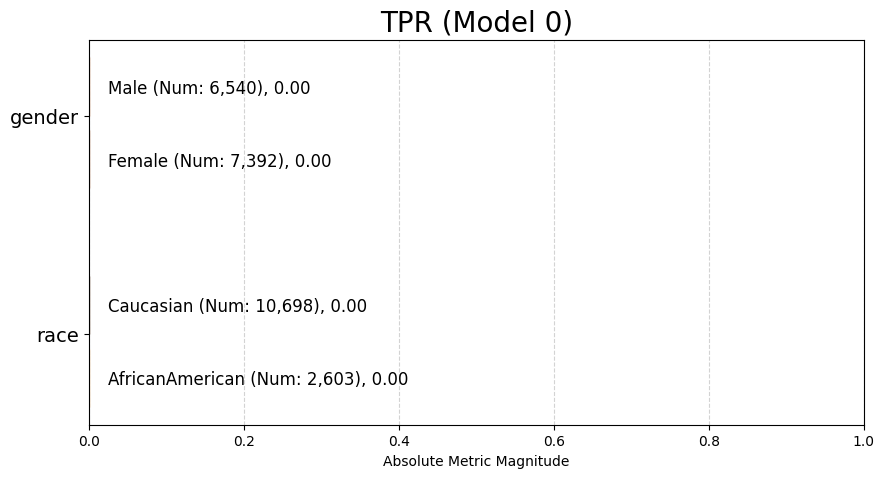

In [84]:
tpr = aqp.plot_group_metric(clean_xtab, 'tpr', min_group_size=0.05)

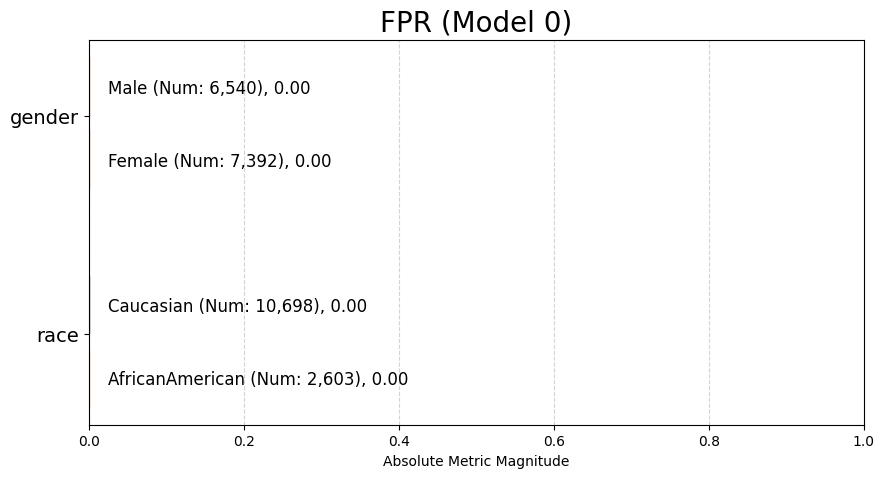

In [85]:
fpr = aqp.plot_group_metric(clean_xtab, 'fpr', min_group_size=0.05)

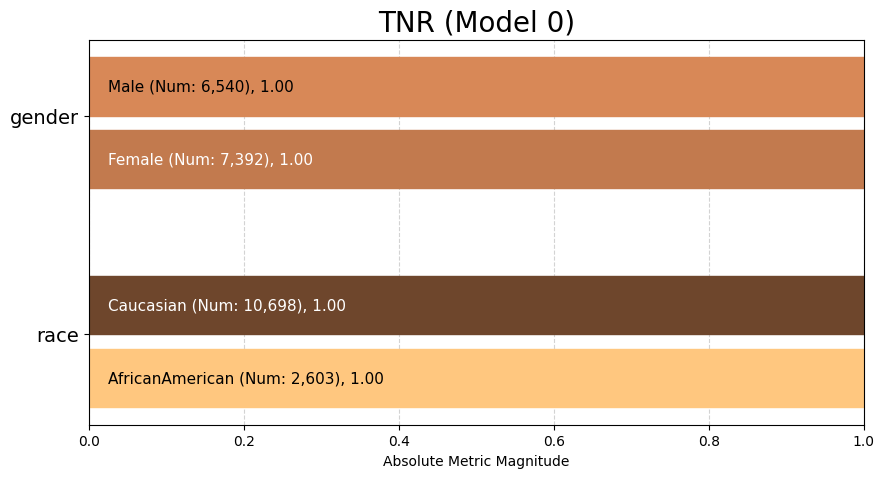

In [86]:
tnr = aqp.plot_group_metric(clean_xtab, 'tnr', min_group_size=0.05)

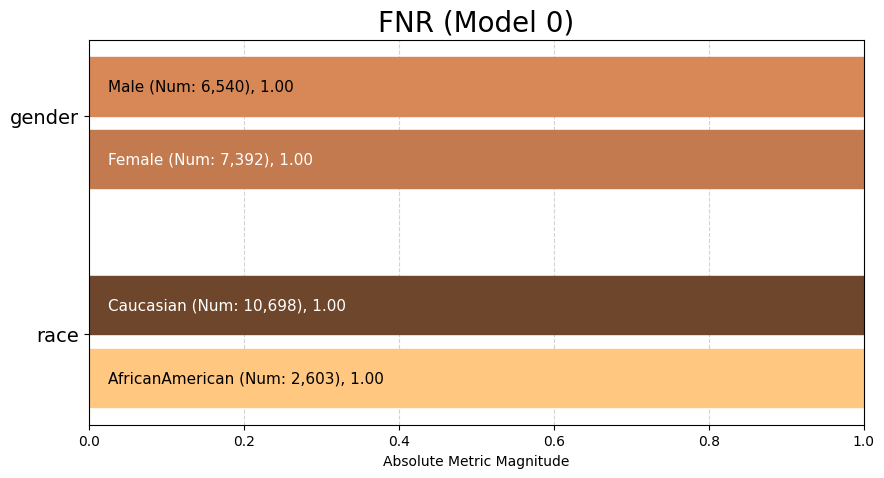

In [87]:
fnr = aqp.plot_group_metric(clean_xtab, 'fnr', min_group_size=0.05)

## Reference Group Selection

Below we have chosen the reference group for our analysis but feel free to select another one.

In [88]:
# test reference group with Caucasian Male
bdf = b.get_disparity_predefined_groups(clean_xtab,
                    original_df=ae_df,
                    ref_groups_dict={'race':'Caucasian', 'gender':'Male'
                                     },
                    alpha=0.05,
                    check_significance=False)


f = Fairness()
fdf = f.get_group_value_fairness(bdf)

## Race and Gender Bias Analysis for Patient Selection

**Question 12**: For the gender and race fields, please plot two metrics that are important for patient selection below and state whether there is a significant bias in your model across any of the groups along with justification for your statement.

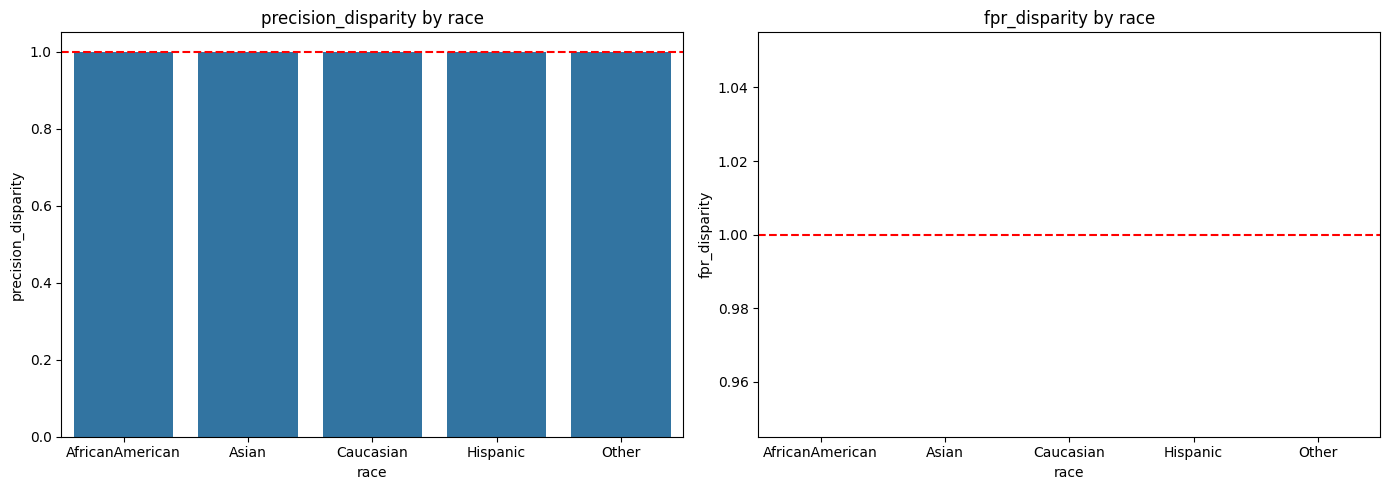

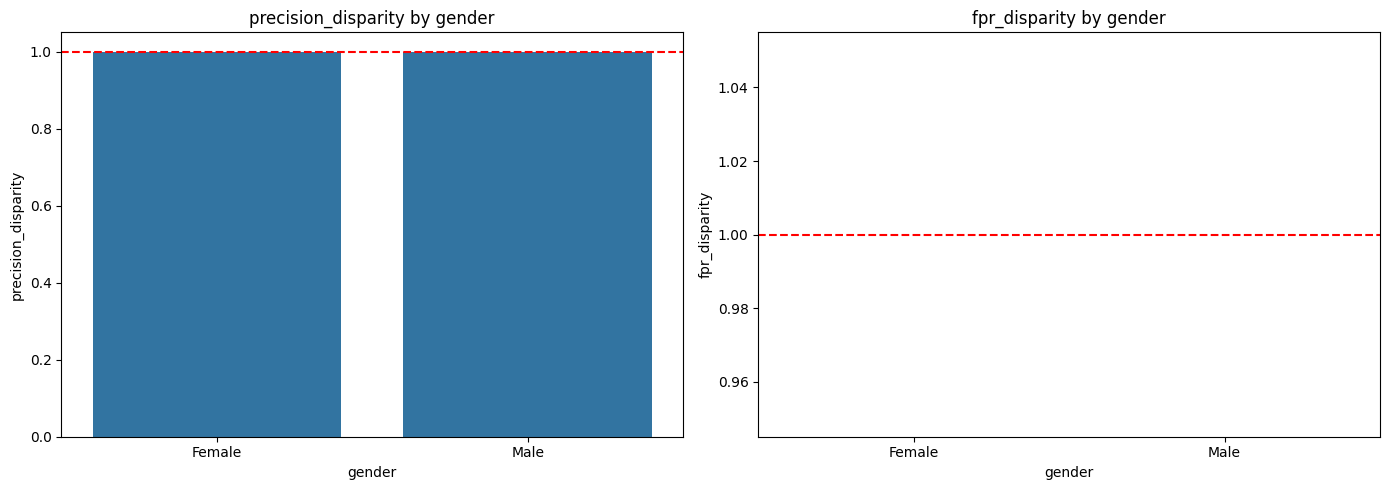

In [89]:
# Plot two metrics

# Is there significant bias in your model for either race or gender?

import seaborn as sns
import matplotlib.pyplot as plt

# Choisir les deux métriques à tracer
metrics_to_plot = ['precision_disparity', 'fpr_disparity']

# On filtre par attribut "race" et "gender"
for attr in ['race', 'gender']:
    subset = fdf[fdf['attribute_name'] == attr]

    fig, ax = plt.subplots(1, 2, figsize=(14, 5))
    for i, metric in enumerate(metrics_to_plot):
        sns.barplot(data=subset, x='attribute_value', y=metric, ax=ax[i])
        ax[i].set_title(f'{metric} by {attr}')
        ax[i].axhline(1.0, ls='--', color='red')  # 1.0 signifie équité parfaite
        ax[i].set_ylabel(metric)
        ax[i].set_xlabel(attr)

    plt.tight_layout()
    plt.show()


## Fairness Analysis Example - Relative to a Reference Group

**Question 13**: Earlier we defined our reference group and then calculated disparity metrics relative to this grouping. Please provide a visualization of the fairness evaluation for this reference group and analyze whether there is disparity.

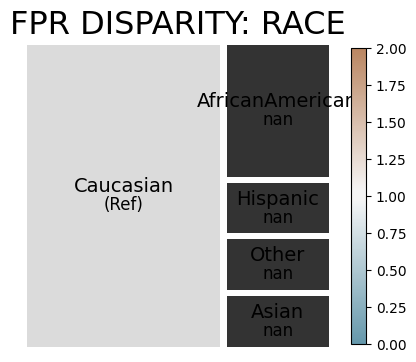

In [90]:
 fpr_disparity = aqp.plot_disparity(bdf, group_metric='fpr_disparity',
                                       attribute_name='race')

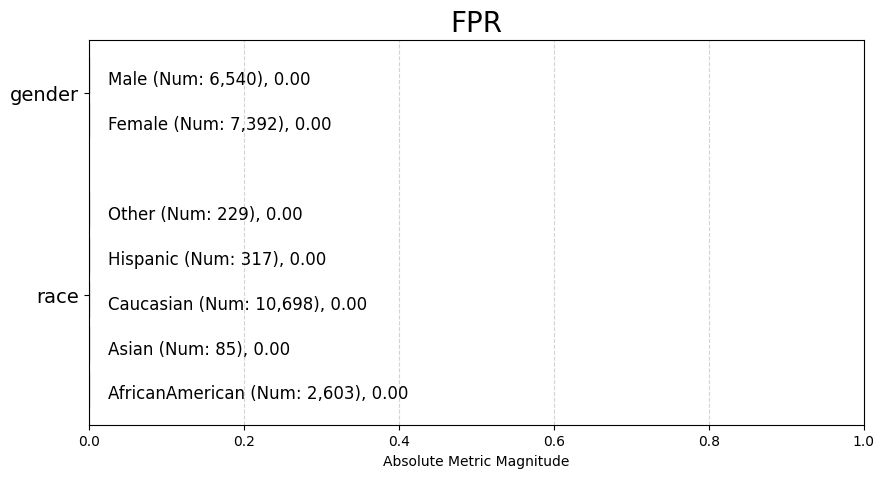

In [91]:
fpr_fairness = aqp.plot_fairness_group(fdf, group_metric='fpr', title=True)

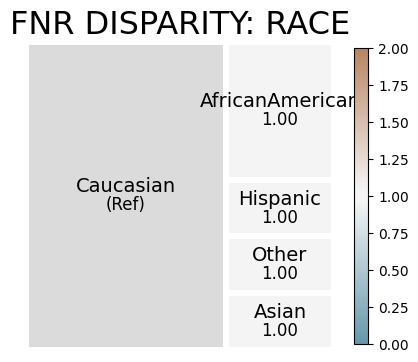

In [92]:
 fnr_disparity = aqp.plot_disparity(bdf, group_metric='fnr_disparity',
                                       attribute_name='race')

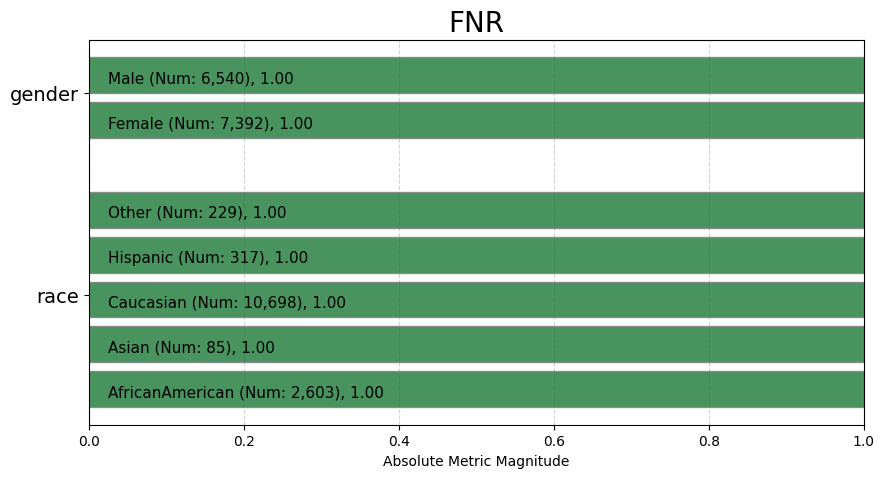

In [93]:
fnr_fairness = aqp.plot_fairness_group(fdf, group_metric='fnr', title=True)

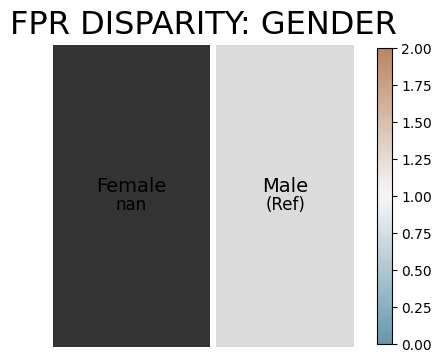

In [94]:
 fpr_disparity = aqp.plot_disparity(bdf, group_metric='fpr_disparity',
                                       attribute_name='gender')

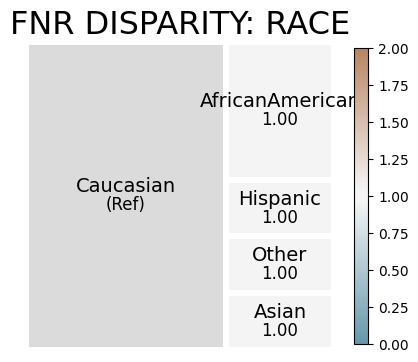

In [95]:
 fnr_disparity = aqp.plot_disparity(bdf, group_metric='fnr_disparity',
                                       attribute_name='race')

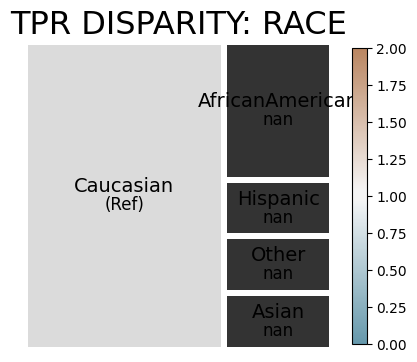

In [96]:
 tpr_disparity = aqp.plot_disparity(bdf, group_metric='tpr_disparity',
                                       attribute_name='race')

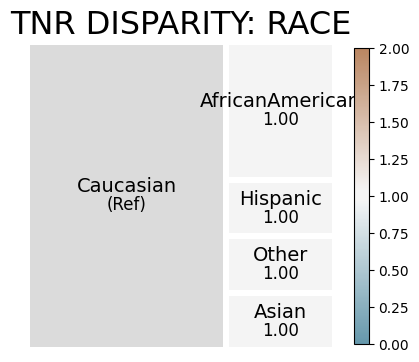

In [97]:
 tnr_disparity = aqp.plot_disparity(bdf, group_metric='tnr_disparity',
                                       attribute_name='race')

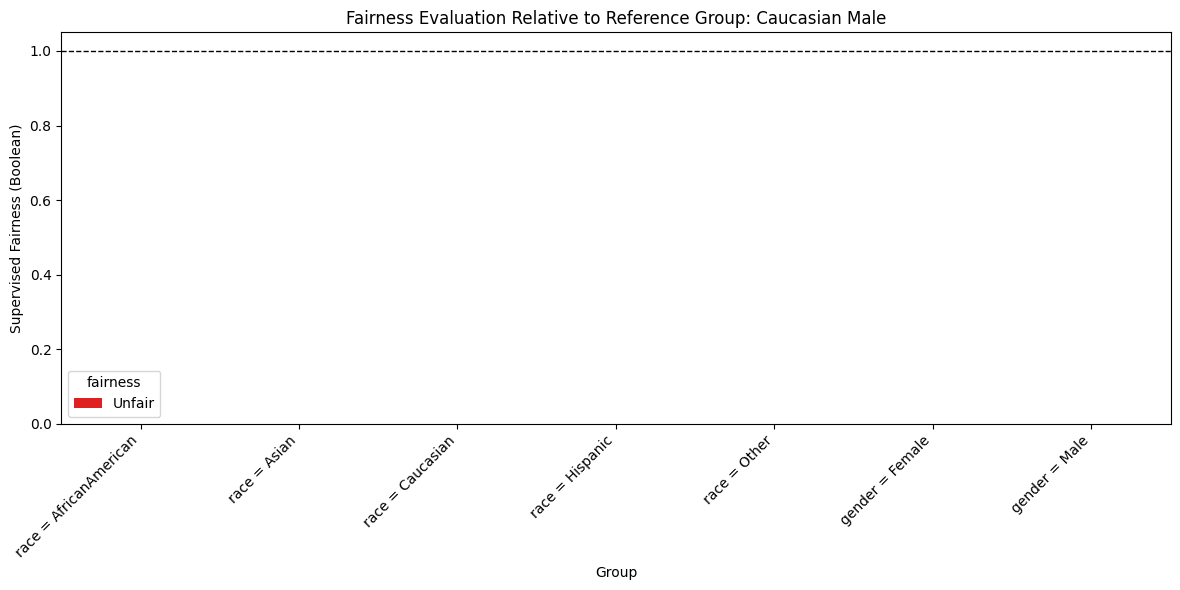

In [98]:
# Reference group fairness plot
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation du DataFrame pour la visualisation
plot_df = fdf[['attribute_name', 'attribute_value', 'Supervised Fairness']].copy()
plot_df['label'] = plot_df['attribute_name'] + ' = ' + plot_df['attribute_value']
plot_df['fairness'] = plot_df['Supervised Fairness'].map({True: 'Fair', False: 'Unfair'})

# Tracer le graphique
plt.figure(figsize=(12, 6))
sns.barplot(data=plot_df, x='label', y='Supervised Fairness', hue='fairness',
            dodge=False, palette={'Fair': 'green', 'Unfair': 'red'})

plt.axhline(1.0, color='black', linestyle='--', linewidth=1)
plt.title('Fairness Evaluation Relative to Reference Group: Caucasian Male')
plt.ylabel('Supervised Fairness (Boolean)')
plt.xlabel('Group')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

